# PROYECTO: PREDICCIÓN DEL RIESGO DE IMPAGO EN CRÉDITOS PERSONALES
**Alumno**: Jorge Martín Pariente  
**Fecha de entrega**: 5 de mayo de 2025

# INTRODUCCIÓN

En el presente proyecto se aborda el problema de predecir la probabilidad de impago de un préstamo por parte de un cliente, en el contexto de la competición Home Credit Default Risk organizada por Kaggle. El objetivo es construir un modelo robusto que permita anticipar situaciones de riesgo crediticio, optimizando así la toma de decisiones en entidades financieras.

Para ello, se ha desarrollado una solución basada en Deep Learning, enmarcada en un pipeline reproducible y fácilmente escalable. A lo largo del notebook se detalla el proceso completo: desde el análisis inicial y la ingeniería de características, hasta la evaluación del modelo, interpretación de resultados y propuesta de aplicación en entorno real. El enfoque está orientado a un público no técnico, con especial atención a los impactos en negocio.

Además, se incluyen comparativas entre distintas transformaciones de datos y configuraciones del modelo, análisis de sensibilidad de hiperparámetros, visualizaciones relevantes para el negocio y una propuesta fundamentada de umbral de decisión según coste/beneficio. Se complementa con un análisis de interpretabilidad mediante SHAP y una recomendación de fuentes externas para enriquecer el modelo predictivo.

# ANÁLISIS EXPLORATORIO DE DATOS

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define la ruta al directorio donde está el archivo
folder_path = '/content/drive/My Drive/UNAV/Asignaturas/Deep Learning/Entregable 2025'

# Define el nombre del archivo
file_name = 'application_train.csv'

# Une el directorio y el nombre del archivo para obtener la ruta completa
file_path = os.path.join(folder_path, file_name)

# Carga el archivo CSV en un DataFrame
df = pd.read_csv(file_path)

In [ ]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(307511, 122)

In [ ]:
# Mostramos resumen con nombre, tipo, únicos y nulos (%)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_summary = pd.DataFrame({
    'columna': df.columns,
    'tipo_dato': df.dtypes.values,
    'valores_únicos': [df[col].nunique() for col in df.columns],
    'nulos (%)': [f"{df[col].isna().sum()} ({df[col].isna().mean():.2%})" for col in df.columns]
})

display(df_summary)

,columna,tipo_dato,valores_únicos,nulos (%)
0,SK_ID_CURR,int64,307511,0 (0.00%)
1,TARGET,int64,2,0 (0.00%)
2,NAME_CONTRACT_TYPE,object,2,0 (0.00%)
3,CODE_GENDER,object,3,0 (0.00%)
4,FLAG_OWN_CAR,object,2,0 (0.00%)
5,FLAG_OWN_REALTY,object,2,0 (0.00%)
6,CNT_CHILDREN,int64,15,0 (0.00%)
7,AMT_INCOME_TOTAL,float64,2548,0 (0.00%)
8,AMT_CREDIT,float64,5603,0 (0.00%)
9,AMT_ANNUITY,float64,13672,12 (0.00%)


In [ ]:
# Número de filas duplicadas (todas las columnas iguales)
duplicadas = df.drop(columns=['SK_ID_CURR']).duplicated().sum()
print("Nº de filas duplicadas:", duplicadas)

Nº de filas duplicadas: 0


In [ ]:
# Dividimos el dataset en 'train' y 'val'
train, val = train_test_split(df, test_size=0.2, stratify=df['TARGET'], random_state=42)

# LIMPIEZA DE DATOS

## Clasificación de variables

In [ ]:
# Clasificamos las variables según su tipo
variables_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
variables_categoricas = df.select_dtypes(include=['object']).columns.tolist()

# Dentro de las numéricas, identificamos las binarias (solo tienen dos valores únicos: 0 y 1)
variables_binarias = [col for col in variables_numericas if df[col].dropna().nunique() == 2]

# Quitamos las binarias de las numéricas generales
variables_numericas = list(set(variables_numericas) - set(variables_binarias))

# Mostramos el resumen
print(f"Variables numéricas: {len(variables_numericas)}")
print(f"Variables categóricas: {len(variables_categoricas)}")
print(f"Variables binarias: {len(variables_binarias)}")

Variables numéricas: 73
Variables categóricas: 16
Variables binarias: 33


### Tipología de variables

Tras una primera exploración del dataset, se han clasificado las variables disponibles en tres grandes grupos según su naturaleza:

- **Variables numéricas**: 73 columnas que recogen información cuantitativa continua o discreta (por ejemplo, ingresos, edad en días, montos de crédito).
- **Variables categóricas**: 16 columnas con valores no numéricos que representan categorías sin un orden inherente (por ejemplo, tipo de contrato o nivel educativo).
- **Variables binarias**: 33 columnas que toman solo dos valores posibles, habitualmente codificados como 0 y 1, representando la presencia o ausencia de una característica.

Esta clasificación resulta clave para definir un tratamiento específico en el pipeline de preprocesado, especialmente en lo relativo a la codificación y normalización de los datos.[texto del enlace](https://)

## Creación de indicadores

Con el objetivo de enriquecer el conjunto de datos y proporcionar al modelo variables más informativas, se han generado indicadores derivados a partir de las variables originales. Estos nuevos atributos capturan relaciones no lineales y ratios relevantes que pueden reflejar con mayor precisión la situación financiera y personal del cliente.

Entre los indicadores creados destacan:

- **`debt_to_income`**: relación entre el importe del crédito solicitado y los ingresos totales declarados, lo que permite identificar casos de sobreendeudamiento relativo.
- **`credit_to_goods_ratio`**: proporción entre el crédito concedido y el valor declarado de los bienes adquiridos, útil para detectar posibles sobrevaloraciones o financiaciones excesivas.
- **`annuity_income_ratio`**: ratio entre la cuota anual y el ingreso total, como medida de carga financiera asumida por el cliente.
- **`employment_to_age_ratio`**: mide la estabilidad laboral en función de la edad, lo cual puede reflejar trayectorias laborales atípicas o situaciones de desempleo prolongado.
- **`registration_lag`**: diferencia entre la fecha de registro y la de última modificación del documento de identidad, potencialmente asociada a cambios recientes en la documentación del cliente.

Estas variables se han calculado de forma automática sobre los conjuntos de datos de entrenamiento y test, y se incorporan como parte del pipeline de preprocesado del modelo.


In [ ]:
# Creamos ratios y derivados para ambos sets
def crear_indicadores(df):
    df = df.copy()

    # Indicadores financieros
    df["debt_to_income"] = df["AMT_CREDIT"] / (df["AMT_INCOME_TOTAL"] + 1)
    df["credit_to_goods_ratio"] = df["AMT_CREDIT"] / (df["AMT_GOODS_PRICE"] + 1)
    df["annuity_income_ratio"] = df["AMT_ANNUITY"] / (df["AMT_INCOME_TOTAL"] + 1)

    # Indicadores de estabilidad laboral
    df["employment_to_age_ratio"] = df["DAYS_EMPLOYED"] / (df["DAYS_BIRTH"] + 1)

    # Registro y publicación de documentos
    df["registration_lag"] = df["DAYS_REGISTRATION"] - df["DAYS_ID_PUBLISH"]

    return df

In [ ]:
# Aplicamos los indicadores a los 3 datasets
df = crear_indicadores(df)
train = crear_indicadores(train)
val = crear_indicadores(val)

print("Indicadores añadidos correctamente a df, train y val.")

# Columnas originales que ya están representadas por indicadores
cols_brutas = [
    "AMT_CREDIT", "AMT_INCOME_TOTAL", "AMT_GOODS_PRICE", "AMT_ANNUITY",
    "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH"
]

# Eliminamos si existen
df = df.drop(columns=[col for col in cols_brutas if col in df.columns], errors='ignore')
train = train.drop(columns=[col for col in cols_brutas if col in train.columns], errors='ignore')
val = val.drop(columns=[col for col in cols_brutas if col in val.columns], errors='ignore')

print("Columnas brutas eliminadas correctamente de df, train y val.")

✅ Indicadores añadidos correctamente a df, train y val.
🧹 Columnas brutas eliminadas correctamente de df, train y val.


## Selección inicial de variables y criterio de exclusión

Durante el análisis exploratorio se ha identificado un conjunto significativo de variables que presentan una alta correlación entre sí, diferenciándose únicamente por el sufijo que acompaña a su nombre: `_AVG`, `_MODE` y `_MEDI`. Estas variables contienen información sobre distintas características de las viviendas, agregadas a diferentes niveles estadísticos (media, moda y mediana).

Tras revisar su composición y valores nulos, se observa que:

- Las variables con sufijos `_AVG`, `_MODE` y `_MEDI` representan diferentes formas de resumir la **misma información estructural**.
- Todas ellas presentan **altos porcentajes de valores nulos** (entre el 48% y el 70%).
- Mantener las tres versiones introduce **colinealidad**, aumenta la **dimensionalidad sin aportar información adicional** sustancial y puede **afectar negativamente al rendimiento y estabilidad del modelo**.
- Además, dificultan la interpretación y claridad del análisis.

Por este motivo, se decide **eliminar de forma sistemática** todas las variables cuyo nombre contenga los sufijos `_AVG`, `_MODE` o `_MEDI`, conservando únicamente aquellas variables originales más representativas del cliente.

---

In [ ]:
# Eliminamos columnas con sufijos _MODE y _MEDI solo si existen
cols_a_eliminar = [col for col in df.columns if col.endswith(('_MODE', '_MEDI', '_AVG'))]
cols_a_eliminar.append("SK_ID_CURR")

# Eliminamos en todos los conjuntos si existen
df = df.drop(columns=[col for col in cols_a_eliminar if col in df.columns], errors='ignore')
train = train.drop(columns=[col for col in cols_a_eliminar if col in train.columns], errors='ignore')
val = val.drop(columns=[col for col in cols_a_eliminar if col in val.columns], errors='ignore')

## Variables conservadas tras la depuración

Una vez aplicados los criterios anteriores, el dataset conserva un conjunto robusto de variables con potencial predictivo, entre las que destacan:

- **Identificadores y objetivo**: `SK_ID_CURR`, `TARGET`.
- **Demográficas**: `CODE_GENDER`, `DAYS_BIRTH`, `NAME_EDUCATION_TYPE`, `NAME_FAMILY_STATUS`.
- **Ingresos y préstamos**: `AMT_INCOME_TOTAL`, `AMT_CREDIT`, `AMT_ANNUITY`, `AMT_GOODS_PRICE`.
- **Laborales**: `DAYS_EMPLOYED`, `NAME_INCOME_TYPE`, `OCCUPATION_TYPE`.
- **Vivienda y propiedades**: `NAME_HOUSING_TYPE`, `FLAG_OWN_CAR`, `FLAG_OWN_REALTY`, `CNT_FAM_MEMBERS`, `OWN_CAR_AGE`.
- **Fuentes externas**: `EXT_SOURCE_1`, `EXT_SOURCE_2`, `EXT_SOURCE_3`.
- **Contactabilidad y teléfonos**: `FLAG_PHONE`, `FLAG_EMAIL`, `FLAG_WORK_PHONE`, etc.
- **Documentación**: `FLAG_DOCUMENT_*`.
- **Historial de solicitud**: `AMT_REQ_CREDIT_BUREAU_*`.

Este conjunto permitirá construir un modelo predictivo sólido y más manejable, evitando redundancias y maximizando la calidad del entrenamiento.

In [ ]:
# Clasificamos las variables según su tipo
variables_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
variables_categoricas = df.select_dtypes(include=['object']).columns.tolist()

# Dentro de las numéricas, identificamos las binarias (solo tienen dos valores únicos: 0 y 1)
variables_binarias = [col for col in variables_numericas if df[col].dropna().nunique() == 2]

# Quitamos las binarias de las numéricas generales
variables_numericas = list(set(variables_numericas) - set(variables_binarias))

## Variables Categóricas

In [ ]:
# Filtramos variables categóricas con ≤10 valores únicos (sin contar nulos)
cat_low_card = [col for col in variables_categoricas if df[col].nunique(dropna=True) <= 10]

# Mostramos las seleccionadas
print(f"Variables categóricas con ≤10 categorías: {len(cat_low_card)}")
print(cat_low_card)

# Filtramos variables categóricas con más de 10 valores únicos (sin contar nulos)
cat_high_card = [col for col in variables_categoricas if df[col].nunique(dropna=True) > 10]

# Mostramos las seleccionadas
print(f"Variables categóricas con >10 categorías: {len(cat_high_card)}")
print(cat_high_card)

Variables categóricas con ≤10 categorías: 10
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START']
Variables categóricas con >10 categorías: 2
['OCCUPATION_TYPE', 'ORGANIZATION_TYPE']


### Análisis de cardinalidad en variables categóricas

Para aplicar una codificación adecuada, se ha analizado la cardinalidad de las variables categóricas, es decir, el número de categorías distintas (sin contar nulos) presentes en cada una.

- Se han identificado **10 variables categóricas de baja cardinalidad** (≤10 categorías), aptas para codificación one-hot sin riesgo de explosión dimensional.
- Por otro lado, se han detectado **2 variables de alta cardinalidad** (>10 categorías): `OCCUPATION_TYPE` y `ORGANIZATION_TYPE`, que requieren un tratamiento diferente, como target encoding o embeddings, para preservar la información sin sobrecargar el modelo.

Este análisis permite diseñar un pipeline de preprocesado eficiente y adaptado a la estructura de los datos.

## < 10 categorías

**Tratamiento de variables categóricas con baja cardinalidad**

Dentro del conjunto de variables categóricas identificadas en el dataset, se realizó una clasificación inicial en función del número de categorías distintas que presentaban. Aquellas variables con **10 o menos categorías únicas** fueron tratadas mediante **codificación one-hot**, también conocida como codificación binaria o `OneHotEncoding`.

Este tipo de codificación consiste en transformar cada categoría en una nueva columna binaria (0/1), lo que permite:

- Preservar la naturaleza no ordinal de estas variables.
- Evitar la introducción de relaciones numéricas artificiales entre categorías.
- Mantener la interpretabilidad de los datos y la trazabilidad de cada valor original.

La codificación se integró en un pipeline de preprocesado utilizando `ColumnTransformer` y se aplicó exclusivamente a las variables categóricas de baja cardinalidad, evitando duplicaciones y manteniendo separadas las variables ya binarias o codificadas por frecuencia o media del target.

Esta transformación garantiza que el modelo pueda procesar correctamente estas variables sin asumir relaciones que no existen entre sus categorías.



| Variable                     | Nº categorías aprox | ¿Ordinal? | ¿Apropiado One Hot? |
|-----------------------------|---------------------|-----------|----------------------|
| NAME_CONTRACT_TYPE          | 2                   | No        | ✅ Sí                |
| CODE_GENDER                 | 2–3                 | No        | ✅ Sí                |
| FLAG_OWN_CAR                | 2                   | No        | ✅ Sí                |
| FLAG_OWN_REALTY             | 2                   | No        | ✅ Sí                |
| NAME_TYPE_SUITE             | 6–7                 | No        | ✅ Sí                |
| NAME_INCOME_TYPE            | 5–6                 | No        | ✅ Sí                |
| NAME_EDUCATION_TYPE         | 5                   | ✅ Sí     | ⚠️ Mejor Label       |
| NAME_FAMILY_STATUS          | 5–6                 | No        | ✅ Sí                |
| NAME_HOUSING_TYPE           | 5–6                 | No        | ✅ Sí                |
| WEEKDAY_APPR_PROCESS_START  | 7                   | No        | ✅ Sí                |


In [ ]:
# Nulos, porcentaje y únicos para train
nulos_train = train[cat_low_card].isna().sum()
porcentaje_train = train[cat_low_card].isna().mean()
valores_unicos_train = train[cat_low_card].nunique(dropna=True)

# Nulos, porcentaje y únicos para val
nulos_val = val[cat_low_card].isna().sum()
porcentaje_val = val[cat_low_card].isna().mean()
valores_unicos_val = val[cat_low_card].nunique(dropna=True)

# Combinamos todo en un solo DataFrame
df_nulos_cat_total = pd.DataFrame({
    'columna': cat_low_card,
    'nulos_train': nulos_train.values,
    'nulos_val': nulos_val.values,
    'nulos_train (%)': [f"{p:.2%}" for p in porcentaje_train],
    'nulos_val (%)': [f"{p:.2%}" for p in porcentaje_val],
    'valores únicos train': valores_unicos_train.values,
    'valores únicos val': valores_unicos_val.values
})

display(df_nulos_cat_total)

,columna,nulos_train,nulos_val,nulos_train (%),nulos_val (%),valores únicos train,valores únicos val
0,NAME_CONTRACT_TYPE,0,0,0.00%,0.00%,2,2
1,CODE_GENDER,0,0,0.00%,0.00%,3,3
2,FLAG_OWN_CAR,0,0,0.00%,0.00%,2,2
3,FLAG_OWN_REALTY,0,0,0.00%,0.00%,2,2
4,NAME_TYPE_SUITE,1029,263,0.42%,0.43%,7,7
5,NAME_INCOME_TYPE,0,0,0.00%,0.00%,8,8
6,NAME_EDUCATION_TYPE,0,0,0.00%,0.00%,5,5
7,NAME_FAMILY_STATUS,0,0,0.00%,0.00%,6,5
8,NAME_HOUSING_TYPE,0,0,0.00%,0.00%,6,6
9,WEEKDAY_APPR_PROCESS_START,0,0,0.00%,0.00%,7,7


### Gestión de valores nulos en variables categóricas

Entre las variables categóricas de baja cardinalidad, solo `NAME_TYPE_SUITE` presenta valores nulos, con un porcentaje muy reducido tanto en el conjunto de entrenamiento (0.42%) como en el de validación (0.43%).

Dado que esta variable describe con quién acude el cliente a la entidad (solo, con pareja, con familia, etc.), y que podría tener un valor informativo relevante, se ha optado por eliminar las filas que contienen nulos en esta columna para evitar imputaciones arbitrarias que distorsionen el significado de la variable. El bajo volumen de eliminaciones permite preservar prácticamente la totalidad del dataset sin afectar su representatividad.

### NAME_TYPE_SUITE

In [ ]:
# Tipo de variable y valores únicos de 'NAME_TYPE_SUITE' en df
print("df['NAME_TYPE_SUITE'] →", df['NAME_TYPE_SUITE'].dtype)
print("Valores únicos en df:", df['NAME_TYPE_SUITE'].dropna().unique())

df['NAME_TYPE_SUITE'] → object
Valores únicos en df: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']


In [ ]:
# Eliminamos filas con nulos en NAME_TYPE_SUITE en train y val
train = train.dropna(subset=['NAME_TYPE_SUITE']).reset_index(drop=True)
val = val.dropna(subset=['NAME_TYPE_SUITE']).reset_index(drop=True)
df = df.dropna(subset=['NAME_TYPE_SUITE']).reset_index(drop=True)

### One-Hot encoding

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# 1. Selección de variables categóricas de baja cardinalidad
cat_low_card = [col for col in variables_categoricas if df[col].nunique(dropna=True) <= 10]

# 2. Pipeline para categóricas
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='NaN')),
    ('onehot', OneHotEncoder(drop=first, handle_unknown='ignore', sparse_output=False))
])

# 3. ColumnTransformer para aplicar solo a esas columnas
preprocessor = ColumnTransformer([
    ('cat', cat_pipeline, cat_low_card)
])

# # 4. Transformaciones
# X_train = preprocessor.fit_transform(train)
# X_val = preprocessor.transform(val)
# X_df = preprocessor.transform(df)

## > 10 categorías

**Codificación de variables categóricas de alta cardinalidad: Frequency Encoding y Target Encoding**

En variables categóricas con un número elevado de categorías distintas, aplicar codificación One-Hot puede resultar ineficiente y contraproducente, ya que genera una gran cantidad de columnas adicionales, lo que puede introducir ruido, aumentar el riesgo de sobreajuste y dificultar la generalización del modelo.

Para estos casos, se han utilizado dos técnicas de codificación más compactas y adecuadas: **Frequency Encoding** y **Target Encoding**.

---

In [ ]:
# Nulos, porcentaje y únicos para train
nulos_train = train[cat_high_card].isna().sum()
porcentaje_train = train[cat_high_card].isna().mean()
valores_unicos_train = train[cat_high_card].nunique(dropna=True)

# Nulos, porcentaje y únicos para val
nulos_val = val[cat_high_card].isna().sum()
porcentaje_val = val[cat_high_card].isna().mean()
valores_unicos_val = val[cat_high_card].nunique(dropna=True)

# Combinamos todo en un solo DataFrame
df_nulos_cat_high = pd.DataFrame({
    'columna': cat_high_card,
    'nulos_train': nulos_train.values,
    'nulos_val': nulos_val.values,
    'nulos_train (%)': [f"{p:.2%}" for p in porcentaje_train],
    'nulos_val (%)': [f"{p:.2%}" for p in porcentaje_val],
    'valores únicos train': valores_unicos_train.values,
    'valores únicos val': valores_unicos_val.values
})

display(df_nulos_cat_high)

,columna,nulos_train,nulos_val,nulos_train (%),nulos_val (%),valores únicos train,valores únicos val
0,OCCUPATION_TYPE,76631,19375,31.28%,31.64%,18,18
1,ORGANIZATION_TYPE,0,0,0.00%,0.00%,58,58


### OCUPATION-TYPE

La variable `OCCUPATION_TYPE` describe el tipo de ocupación declarada por el solicitante del préstamo. Presenta un total de 18 categorías distintas y alrededor de un 31% de valores ausentes.

Debido a su **alta cardinalidad**, aplicar una codificación one-hot generaría un número elevado de columnas, lo que podría introducir ruido y aumentar el riesgo de sobreajuste en el modelo, especialmente al tratarse de una red neuronal.

En lugar de eliminar la variable o reducirla manualmente, se optó por aplicar **Frequency Encoding**, es decir, codificar cada categoría con su frecuencia relativa en el conjunto de entrenamiento. Esta codificación permite representar la variable de forma compacta, conservando información estructural sin inflar dimensionalmente el dataset.

Además, `OCCUPATION_TYPE` podría no mostrar una relación categórica directa con el `TARGET`, por lo que utilizar técnicas supervisadas como Target Encoding podría inducir sobreajuste sin aportar una ganancia real de información. La codificación por frecuencia ofrece en este caso una solución robusta, eficiente y compatible con modelos de Deep Learning.

Los valores ausentes se imputaron como una categoría adicional (`'NaN'`), lo que permite al modelo aprender si la ausencia de información sobre el tipo de ocupación tiene o no valor predictivo.

In [ ]:
# Tipo de variable y valores únicos
print("df['OCCUPATION_TYPE'] →", df['OCCUPATION_TYPE'].dtype)
print("Valores únicos en df:", df['OCCUPATION_TYPE'].dropna().unique())

# Porcentaje y número de nulos
print("Nº de nulos en df('OCCUPATION_TYPE'):", df['OCCUPATION_TYPE'].isnull().sum())
print("% de nulos en df('OCCUPATION_TYPE'):", round(df['OCCUPATION_TYPE'].isnull().mean() * 100, 2), "%")

# Reemplazamos nulos por 'NaN' en train y val
train['OCCUPATION_TYPE'] = train['OCCUPATION_TYPE'].fillna('NaN')
val['OCCUPATION_TYPE'] = val['OCCUPATION_TYPE'].fillna('NaN')


df['OCCUPATION_TYPE'] → object
Valores únicos en df: ['Laborers' 'Core staff' 'Accountants' 'Managers' 'Drivers' 'Sales staff'
 'Cleaning staff' 'Cooking staff' 'Private service staff' 'Medicine staff'
 'Security staff' 'High skill tech staff' 'Waiters/barmen staff'
 'Low-skill Laborers' 'Realty agents' 'Secretaries' 'IT staff' 'HR staff']
Nº de nulos en df('OCCUPATION_TYPE'): 96006
% de nulos en df('OCCUPATION_TYPE'): 31.35 %


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import numpy as np

# 1. Crear el diccionario de frecuencias desde train
freq_map_occ = train['OCCUPATION_TYPE'].value_counts(normalize=True).to_dict()

# 2. Crear transformador con np.vectorize para trabajar sobre arrays
freq_encoder = FunctionTransformer(lambda x: np.vectorize(freq_map_occ.get)(x), validate=False)

# 3. Pipeline para OCCUPATION_TYPE
occupation_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='NaN')),
    ('freq_encoder', freq_encoder)
])

# 4. ColumnTransformer para aplicarlo a esa columna
preprocessor = ColumnTransformer([
    ('occupation', occupation_pipeline, ['OCCUPATION_TYPE'])
])

# # 5. Aplicación
# X_train_occ = preprocessor.fit_transform(train)
# X_val_occ = preprocessor.transform(val)
# X_df_occ = preprocessor.transform(df)

### ORGANIZATION_TYPE

La variable `ORGANIZATION_TYPE` describe el tipo de organización donde trabaja el cliente, con categorías como "Business Entity Type 3", "Self-employed", "Police", entre otras. Presenta una **alta cardinalidad**, con más de 50 valores únicos, y puede reflejar indirectamente aspectos socioeconómicos o de estabilidad laboral del solicitante, lo que la convierte en una variable potencialmente informativa para el modelo.

Dado que aplicar one-hot encoding sobre esta variable supondría una explosión dimensional significativa y podría introducir ruido en el modelo, se ha optado por aplicar **target encoding**. Esta técnica permite codificar cada categoría con la media del target (`1` = impago) en los registros donde aparece, capturando así el riesgo histórico asociado a cada tipo de organización.

Este tipo de codificación es especialmente apropiado en variables de alta cardinalidad con relación potencial al objetivo, ya que permite conservar el valor predictivo sin inflar el número de variables y sin perder información relevante. Para evitar filtraciones de información y sobreajuste, el cálculo se realiza únicamente sobre los datos de entrenamiento.


In [ ]:
# Tipo de variable y valores únicos
print("df['ORGANIZATION_TYPE'] →", df['ORGANIZATION_TYPE'].dtype)
print("Valores únicos en df:", df['ORGANIZATION_TYPE'].dropna().unique())

# Porcentaje y número de nulos
print("Nº de nulos en df('ORGANIZATION_TYPE'):", df['ORGANIZATION_TYPE'].isnull().sum())
print("% de nulos en df('ORGANIZATION_TYPE'):", round(df['ORGANIZATION_TYPE'].isnull().mean() * 100, 2), "%")

df['ORGANIZATION_TYPE'] → object
Valores únicos en df: ['Business Entity Type 3' 'School' 'Government' 'Religion' 'Other' 'XNA'
 'Electricity' 'Medicine' 'Business Entity Type 2' 'Self-employed'
 'Transport: type 2' 'Construction' 'Housing' 'Kindergarten'
 'Trade: type 7' 'Industry: type 11' 'Military' 'Services'
 'Security Ministries' 'Transport: type 4' 'Industry: type 1' 'Emergency'
 'Security' 'Trade: type 2' 'University' 'Police' 'Business Entity Type 1'
 'Postal' 'Transport: type 3' 'Industry: type 4' 'Agriculture'
 'Restaurant' 'Culture' 'Hotel' 'Industry: type 7' 'Trade: type 3'
 'Industry: type 3' 'Bank' 'Industry: type 9' 'Insurance' 'Trade: type 6'
 'Industry: type 2' 'Transport: type 1' 'Industry: type 12' 'Mobile'
 'Trade: type 1' 'Industry: type 5' 'Industry: type 10' 'Legal Services'
 'Advertising' 'Trade: type 5' 'Cleaning' 'Industry: type 13'
 'Trade: type 4' 'Telecom' 'Industry: type 8' 'Realtor' 'Industry: type 6']
Nº de nulos en df('ORGANIZATION_TYPE'): 0
% de nulos

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# 1. Crear el diccionario de medias del TARGET desde train
target_map_org = train.groupby('ORGANIZATION_TYPE')['TARGET'].mean().to_dict()

# 2. Crear transformador con np.vectorize
target_encoder = FunctionTransformer(lambda x: np.vectorize(target_map_org.get)(x), validate=False)

# 3. Pipeline para ORGANIZATION_TYPE
organization_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='NaN')),
    ('target_encoder', target_encoder)
])

# 4. ColumnTransformer para aplicar solo a esa columna
preprocessor_org = ColumnTransformer([
    ('organization', organization_pipeline, ['ORGANIZATION_TYPE'])
])

# # 5. Aplicación
# X_train_org = preprocessor_org.fit_transform(train)
# X_val_org = preprocessor_org.transform(val)
# X_df_org = preprocessor_org.transform(df)

| Tipo de variable categórica | Técnica de codificación  | ¿Incluida en pipeline? |
|-----------------------------|---------------------------|-------------------------|
| Baja cardinalidad (≤10)     | One Hot Encoding          | ✅ Sí                   |
| `OCCUPATION_TYPE`           | Frequency Encoding        | ✅ Sí                   |
| `ORGANIZATION_TYPE`         | Target Encoding (media)   | ✅ Sí                   |


## Variables numéricas no binarias

El dataset contiene múltiples variables numéricas con distintos porcentajes de valores ausentes. Para tratarlas de forma consistente y minimizar la pérdida de información, se ha definido una estrategia escalonada en función del porcentaje de nulos en cada variable:

- **Muy pocos nulos (<1%)**: se eliminan directamente las filas afectadas, ya que el impacto sobre el tamaño muestral es despreciable.
- **Pocos nulos (1%–5%)**: se imputan los valores faltantes con la **mediana**, evitando así la influencia de valores extremos.
- **Nulos moderados (5%–30%)**: además de imputar con la **mediana**, se crea una columna binaria adicional (`_MISSING`) que indica si el valor original estaba ausente. Esto permite al modelo detectar patrones asociados a la ausencia de información.
- **Muchos nulos (>30%)**: se aplica la misma lógica que en el caso anterior (mediana + indicador), ya que eliminar las variables supondría perder información potencialmente útil.

Esta estrategia busca mantener la integridad del dataset, reducir el sesgo de imputación y permitir que el modelo aprenda también de la presencia o ausencia de ciertos datos.


In [ ]:
# Filtramos variables numéricas no binarias
vars_numericas_no_binarias = [col for col in df.select_dtypes(include=['int64', 'float64']).columns
                              if df[col].nunique(dropna=True) > 2]

In [ ]:
# Nulos, porcentaje y únicos para train
nulos_train = train[vars_numericas_no_binarias].isna().sum()
porcentaje_train = train[vars_numericas_no_binarias].isna().mean()
valores_unicos_train = train[vars_numericas_no_binarias].nunique(dropna=True)

# Nulos, porcentaje y únicos para val
nulos_val = val[vars_numericas_no_binarias].isna().sum()
porcentaje_val = val[vars_numericas_no_binarias].isna().mean()
valores_unicos_val = val[vars_numericas_no_binarias].nunique(dropna=True)

# Combinamos todo en un solo DataFrame
df_nulos_num = pd.DataFrame({
    'columna': vars_numericas_no_binarias,
    'nulos_train': nulos_train.values,
    'nulos_val': nulos_val.values,
    'nulos_train (%)': [f"{p:.2%}" for p in porcentaje_train],
    'nulos_val (%)': [f"{p:.2%}" for p in porcentaje_val],
})

display(df_nulos_num)

,columna,nulos_train,nulos_val,nulos_train (%),nulos_val (%)
0,CNT_CHILDREN,0,0,0.00%,0.00%
1,REGION_POPULATION_RELATIVE,0,0,0.00%,0.00%
2,OWN_CAR_AGE,161714,40334,66.01%,65.86%
3,CNT_FAM_MEMBERS,0,0,0.00%,0.00%
4,REGION_RATING_CLIENT,0,0,0.00%,0.00%
5,REGION_RATING_CLIENT_W_CITY,0,0,0.00%,0.00%
6,HOUR_APPR_PROCESS_START,0,0,0.00%,0.00%
7,EXT_SOURCE_1,138019,34633,56.34%,56.55%
8,EXT_SOURCE_2,530,129,0.22%,0.21%
9,EXT_SOURCE_3,48636,12115,19.85%,19.78%


### < 1% de valores nulos

In [ ]:
# Eliminamos filas con nulos en columnas numéricas que tengan <1% de nulos en train, si existen en cada dataset
columnas_a_limpiar = df_nulos_num[df_nulos_num['nulos_train (%)'].str.rstrip('%').astype(float) < 1]['columna']

columnas_a_limpiar_train = [col for col in columnas_a_limpiar if col in train.columns]
columnas_a_limpiar_val = [col for col in columnas_a_limpiar if col in val.columns]
columnas_a_limpiar_df = [col for col in columnas_a_limpiar if col in df.columns]

train = train.dropna(subset=columnas_a_limpiar_train).reset_index(drop=True)
val = val.dropna(subset=columnas_a_limpiar_val).reset_index(drop=True)
df = df.dropna(subset=columnas_a_limpiar_df).reset_index(drop=True)

### 1% < % valores nulos < 5%

### > 5% de *nulos*

In [ ]:
# Filtramos variables numéricas no binarias
vars_numericas_no_binarias = [col for col in df.select_dtypes(include=['int64', 'float64']).columns
                              if df[col].nunique(dropna=True) > 2]

# Nulos, porcentaje y únicos para train
nulos_train = train[vars_numericas_no_binarias].isna().sum()
porcentaje_train = train[vars_numericas_no_binarias].isna().mean()
valores_unicos_train = train[vars_numericas_no_binarias].nunique(dropna=True)
tipos_train = train[vars_numericas_no_binarias].dtypes

# Nulos, porcentaje y únicos para val
nulos_val = val[vars_numericas_no_binarias].isna().sum()
porcentaje_val = val[vars_numericas_no_binarias].isna().mean()
valores_unicos_val = val[vars_numericas_no_binarias].nunique(dropna=True)
tipos_val = val[vars_numericas_no_binarias].dtypes

#

# Combinamos todo en un solo DataFrame
df_nulos_num = pd.DataFrame({
    'columna': vars_numericas_no_binarias,
    'dato_train': tipos_train.values,
    'dato_val': tipos_val.values,
    'nulos_train': nulos_train.values,
    'nulos_val': nulos_val.values,
    'nulos_train (%)': [f"{p:.2%}" for p in porcentaje_train],
    'nulos_val (%)': [f"{p:.2%}" for p in porcentaje_val],
})

# # Filtramos solo columnas donde haya al menos un nulo en train o val
# df_nulos_num = df_nulos_num[
#     (df_nulos_num['nulos_train'] > 0) | (df_nulos_num['nulos_val'] > 0)
# ].reset_index(drop=True)

display(df_nulos_num)

,columna,dato_train,dato_val,nulos_train,nulos_val,nulos_train (%),nulos_val (%)
0,CNT_CHILDREN,int64,int64,0,0,0.00%,0.00%
1,REGION_POPULATION_RELATIVE,float64,float64,0,0,0.00%,0.00%
2,OWN_CAR_AGE,float64,float64,160803,40109,66.00%,65.86%
3,CNT_FAM_MEMBERS,float64,float64,0,0,0.00%,0.00%
4,REGION_RATING_CLIENT,int64,int64,0,0,0.00%,0.00%
5,REGION_RATING_CLIENT_W_CITY,int64,int64,0,0,0.00%,0.00%
6,HOUR_APPR_PROCESS_START,int64,int64,0,0,0.00%,0.00%
7,EXT_SOURCE_1,float64,float64,137234,34418,56.33%,56.52%
8,EXT_SOURCE_2,float64,float64,0,0,0.00%,0.00%
9,EXT_SOURCE_3,float64,float64,48228,12023,19.80%,19.74%


In [ ]:
# 1. Identificar las columnas que tienen valores nulos
nulos_columns = [col for col in vars_numericas_no_binarias if train[col].isna().any()]

# 2. Crear un DataFrame con las columnas que tienen valores nulos
nulos_df = pd.DataFrame({
    'columna': nulos_columns,
    'tiene_nulos': [train[col].isna().sum() > 0 for col in nulos_columns]
})

# 3. Mostrar el resultado
display(nulos_df)

,columna,tiene_nulos
0,OWN_CAR_AGE,True
1,EXT_SOURCE_1,True
2,EXT_SOURCE_3,True
3,AMT_REQ_CREDIT_BUREAU_HOUR,True
4,AMT_REQ_CREDIT_BUREAU_DAY,True
5,AMT_REQ_CREDIT_BUREAU_WEEK,True
6,AMT_REQ_CREDIT_BUREAU_MON,True
7,AMT_REQ_CREDIT_BUREAU_QRT,True
8,AMT_REQ_CREDIT_BUREAU_YEAR,True


In [ ]:
# 1. Crear las columnas '_MISSING' para las columnas con valores nulos
for col in nulos_columns:
    # Asignamos 1 si el valor es nulo, 0 si no lo es
    train[f"missingindicator_{col}"] = train[col].isna().astype(int)
    val[f"missingindicator_{col}"] = val[col].isna().astype(int)
    df[f"missingindicator_{col}"] = df[col].isna().astype(int)

# 2. Mostrar las primeras filas para verificar la creación de las nuevas columnas
display(train[[f"missingindicator_{col}" for col in nulos_columns]].head())

,missingindicator_OWN_CAR_AGE,missingindicator_EXT_SOURCE_1,missingindicator_EXT_SOURCE_3,missingindicator_AMT_REQ_CREDIT_BUREAU_HOUR,missingindicator_AMT_REQ_CREDIT_BUREAU_DAY,missingindicator_AMT_REQ_CREDIT_BUREAU_WEEK,missingindicator_AMT_REQ_CREDIT_BUREAU_MON,missingindicator_AMT_REQ_CREDIT_BUREAU_QRT,missingindicator_AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,0,0,0,0,0,0,0
1,0,1,1,1,1,1,1,1,1
2,1,1,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1


In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Ahora el FunctionTransformer utilizará esta función para crear los indicadores de valores nulos
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Imputación
    ('scaler', MinMaxScaler())  # Escalado
])

def replace_outliers_with_nan(X):
    X_df = pd.DataFrame(X).copy()
    for col in X_df.columns:
        q1 = X_df[col].quantile(0.25)
        q3 = X_df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        X_df[col] = X_df[col].mask((X_df[col] < lower) | (X_df[col] > upper), np.nan)
    return X_df.values

# Pipeline con tratamiento de outliers
num_pipeline_noout = Pipeline([
    ('outlier_removal', FunctionTransformer(replace_outliers_with_nan, feature_names_out='one-to-one')),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

## Variables numéricas binarias

El dataset incluye un conjunto de variables binarias que, aunque están codificadas como enteros (`int64`), representan indicadores booleanos con dos posibles valores: 0 (ausencia) y 1 (presencia).

A diferencia de las variables categóricas, estas variables **ya están correctamente codificadas para el modelo**. Al tratarse de indicadores claros, su representación como 0 o 1 es directamente interpretable por modelos de Deep Learning, sin necesidad de transformaciones adicionales como el One-Hot Encoding.

Además:

- El espacio muestral es muy reducido (solo dos valores), por lo que no hay riesgo de introducir ambigüedad ni relaciones espurias.
- Evitar el One-Hot Encoding reduce dimensionalidad y simplifica el pipeline.
- Esta codificación es nativa y eficiente para redes neuronales, donde las entradas binarizadas permiten una mejor propagación hacia las capas ocultas.

Por estos motivos, se ha optado por **mantener las variables binarias en su formato original**, tratándolas como variables de paso directo (`passthrough`) dentro del pipeline, sin imputación ni codificación adicional.


In [ ]:
# Filtramos variables binarias: tipo numérico y solo dos valores distintos (0 y 1, por ejemplo)
vars_binarias = [col for col in df.select_dtypes(include=['int64', 'float64']).columns
                 if df[col].nunique(dropna=True) == 2]

In [ ]:
# Ver los tipos de variables en las columnas binarias antes de transformar
print(train[vars_binarias].dtypes)

TARGET                                         int64
FLAG_EMP_PHONE                                 int64
FLAG_WORK_PHONE                                int64
FLAG_CONT_MOBILE                               int64
FLAG_PHONE                                     int64
FLAG_EMAIL                                     int64
REG_REGION_NOT_LIVE_REGION                     int64
REG_REGION_NOT_WORK_REGION                     int64
LIVE_REGION_NOT_WORK_REGION                    int64
REG_CITY_NOT_LIVE_CITY                         int64
REG_CITY_NOT_WORK_CITY                         int64
LIVE_CITY_NOT_WORK_CITY                        int64
FLAG_DOCUMENT_2                                int64
FLAG_DOCUMENT_3                                int64
FLAG_DOCUMENT_4                                int64
FLAG_DOCUMENT_5                                int64
FLAG_DOCUMENT_6                                int64
FLAG_DOCUMENT_7                                int64
FLAG_DOCUMENT_8                               

In [ ]:
# Nulos, porcentaje y únicos para train (variables binarias)
nulos_train = train[vars_binarias].isna().sum()
porcentaje_train = train[vars_binarias].isna().mean()
valores_unicos_train = train[vars_binarias].nunique(dropna=True)

# Nulos, porcentaje y únicos para val
nulos_val = val[vars_binarias].isna().sum()
porcentaje_val = val[vars_binarias].isna().mean()
valores_unicos_val = val[vars_binarias].nunique(dropna=True)

# Combinamos todo en un solo DataFrame
df_nulos_bin = pd.DataFrame({
    'columna': vars_binarias,
    'nulos_train': nulos_train.values,
    'nulos_val': nulos_val.values,
    'nulos_train (%)': [f"{p:.2%}" for p in porcentaje_train],
    'nulos_val (%)': [f"{p:.2%}" for p in porcentaje_val],
    'valores únicos train': valores_unicos_train.values,
    'valores únicos val': valores_unicos_val.values
})

# Filtramos solo columnas con al menos un nulo en train o val
df_nulos_bin = df_nulos_bin[
    (df_nulos_bin['nulos_train'] > 0) | (df_nulos_bin['nulos_val'] > 0)
].reset_index(drop=True)

display(df_nulos_bin)

,columna,nulos_train,nulos_val,nulos_train (%),nulos_val (%),valores únicos train,valores únicos val


## Pipeline Completo

Para organizar el tratamiento de las distintas tipologías de variables, se ha construido un `ColumnTransformer` que integra todos los bloques del pipeline de preprocesado de forma modular y escalable. Se han definido dos versiones: una con detección de outliers (`full_preprocessor`) y otra sin ella (`full_preprocessor_noout`), con el objetivo de comparar su impacto en el rendimiento del modelo.

Ambos transformadores aplican el siguiente esquema:

- **`num_pipeline` / `num_pipeline_noout`**: procesamiento de variables numéricas no binarias, incluyendo imputación, escalado y tratamiento opcional de outliers.
- **`cat_pipeline`**: codificación one-hot de las variables categóricas de baja cardinalidad.
- **`occupation_pipeline`**: codificación por frecuencia para `OCCUPATION_TYPE`.
- **`organization_pipeline`**: codificación por target encoding para `ORGANIZATION_TYPE`.
- **`passthrough`**: las variables binarias se mantienen sin transformar, ya que ya están en formato numérico adecuado.

Esta estructura permite encapsular todo el preprocesamiento de manera reproducible y asegura que el mismo flujo de transformación se aplique tanto en entrenamiento como en validación o test.


In [ ]:
from sklearn.compose import ColumnTransformer

# Asumimos que ya has definido estos previamente:
# - num_pipeline
# - cat_pipeline
# - occupation_pipeline
# - organization_pipeline
# - vars_numericas_no_binarias
# - cat_low_card
# - vars_binarias

# ColumnTransformer que integra todos los bloques
full_preprocessor = ColumnTransformer([
    ('num', num_pipeline, vars_numericas_no_binarias),
    ('cat', cat_pipeline, cat_low_card),
    ('occupation', occupation_pipeline, ['OCCUPATION_TYPE']),
    ('organization', organization_pipeline, ['ORGANIZATION_TYPE']),
    ('bin', 'passthrough', vars_binarias)
])

# ColumnTransformer que integra todos los bloques
full_preprocessor_noout = ColumnTransformer([
    ('num', num_pipeline_noout, vars_numericas_no_binarias),
    ('cat', cat_pipeline, cat_low_card),
    ('occupation', occupation_pipeline, ['OCCUPATION_TYPE']),
    ('organization', organization_pipeline, ['ORGANIZATION_TYPE']),
    ('bin', 'passthrough', vars_binarias)
])

In [ ]:
vars_numericas_no_binarias

['CNT_CHILDREN',
 'REGION_POPULATION_RELATIVE',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'debt_to_income',
 'credit_to_goods_ratio',
 'annuity_income_ratio',
 'employment_to_age_ratio',
 'registration_lag']

### Con outliers

In [ ]:
# Aplicamos el preprocesamiento completo
X_train_final = full_preprocessor.fit_transform(train)
X_val_final = full_preprocessor.transform(val)
X_df_final = full_preprocessor.transform(df)

# Convertimos los arrays de salida a DataFrame para poder usar drop
X_train_final_df = pd.DataFrame(X_train_final)
X_val_final_df = pd.DataFrame(X_val_final)
X_df_final_df = pd.DataFrame(X_df_final)

### Sin outliers

In [ ]:
# Aplicamos el preprocesador que trata outliers
X_train_final_noout = full_preprocessor_noout.fit_transform(train)
X_val_final_noout = full_preprocessor_noout.transform(val)
X_df_final_noout = full_preprocessor_noout.transform(df)

# Convertimos a DataFrame
X_train_final_noout_df = pd.DataFrame(X_train_final_noout)
X_val_final_noout_df = pd.DataFrame(X_val_final_noout)
X_df_final_noout_df = pd.DataFrame(X_df_final_noout)

In [ ]:
# 1. Extraemos los nombres generados por los transformadores compatibles
cat_features = full_preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(cat_low_card)
num_features = full_preprocessor.named_transformers_['num'].get_feature_names_out(vars_numericas_no_binarias)

# # 2. Aseguramos que las binarias aún existan en el dataset
# vars_binarias = [col for col in vars_binarias if col in train.columns]

# 4. Creamos la lista de nombres de características finales
final_feature_names = (
    list(num_features)
    + list(cat_features)
    + ['OCCUPATION_TYPE_FREQ', 'ORGANIZATION_TYPE_TE']
    + vars_binarias
)

In [ ]:
X_train_final_df = pd.DataFrame(X_train_final, columns=final_feature_names)
X_val_final_df = pd.DataFrame(X_val_final, columns=final_feature_names)
X_df_final_df = pd.DataFrame(X_df_final, columns=final_feature_names)

# Objetivo (target)
y_train = train['TARGET'].values
y_val = val['TARGET'].values
df_target = df['TARGET'].values

X_train_final_df = X_train_final_df.drop(columns=['TARGET'])
X_val_final_df = X_val_final_df.drop(columns=['TARGET'])
X_df_final_df = X_df_final_df.drop(columns=['TARGET'])

In [ ]:
# Convertimos los arrays procesados a DataFrame, usando los mismos nombres de columnas
X_train_final_noout_df = pd.DataFrame(X_train_final_noout, columns=final_feature_names)
X_val_final_noout_df = pd.DataFrame(X_val_final_noout, columns=final_feature_names)
X_df_final_noout_df = pd.DataFrame(X_df_final_noout, columns=final_feature_names)

# Eliminamos la columna TARGET si estuviera presente en los features (por seguridad)
X_train_final_noout_df = X_train_final_noout_df.drop(columns=['TARGET'])
X_val_final_noout_df = X_val_final_noout_df.drop(columns=['TARGET'])
X_df_final_noout_df = X_df_final_noout_df.drop(columns=['TARGET'])

In [ ]:
# Verificar si 'TARGET' está en X_train_final_df
'TARGET' in X_df_final_df.columns

False

In [ ]:
# Compara el número de columnas generadas
print("Número de columnas generadas en X_train_final:", X_train_final.shape[1])
print("Número de nombres en final_feature_names:", len(final_feature_names))

# Compara el número de columnas generadas (sin outliers)
print("Número de columnas generadas en X_train_final_noout:", X_train_final_noout.shape[1])
print("Número de nombres en final_feature_names:", len(final_feature_names))

Número de columnas generadas en X_train_final: 116
Número de nombres en final_feature_names: 116
Número de columnas generadas en X_train_final_noout: 116
Número de nombres en final_feature_names: 116


In [ ]:
# Asegúrate de que usas el DataFrame con columnas
min_val = X_train_final_df["credit_to_goods_ratio"].min()
max_val = X_train_final_df["credit_to_goods_ratio"].max()

print("🔎 credit_to_goods_ratio (con_outliers)")
print(f"→ Mínimo: {min_val}")
print(f"→ Máximo: {max_val}")

🔎 credit_to_goods_ratio (con_outliers)
→ Mínimo: 0.0
→ Máximo: 1.0000000000000002


In [ ]:
datasets = [
    {
        "nombre": "con_outliers",
        "X_train": X_train_final_df,
        "X_val": X_val_final_df,
        "y_train": y_train,
        "y_val": y_val
    },
    {
        "nombre": "sin_outliers",
        "X_train": X_train_final_noout_df,
        "X_val": X_val_final_noout_df,
        "y_train": y_train,
        "y_val": y_val
    }
]

In [ ]:
# Revisar tipos y valores fuera de rango en columnas
import pandas as pd

filas = []

for ds in datasets:
    nombre_ds = ds["nombre"]
    for split in ["X_train", "X_val"]:
        df = ds[split]

        for col in df.columns:
            tipo = df[col].dtype
            min_val = df[col].min()
            max_val = df[col].max()
            fuera_rango = (min_val < 0) or (max_val > 1)
            es_float = tipo == "float64" or tipo == "float32"

            # Mostrar solo si NO es float o está fuera del rango
            if not es_float or fuera_rango:
                filas.append({
                    "columna": col,
                    "dataset": nombre_ds,
                    "split": split,
                    "tipo_dato": str(tipo),
                    "fuera_[0,1]": fuera_rango
                })

# Mostrar resultados
df_errores = pd.DataFrame(filas)
display(df_errores)

,columna,dataset,split,tipo_dato,"fuera_[0,1]"
0,credit_to_goods_ratio,con_outliers,X_train,float64,True
1,EXT_SOURCE_1,con_outliers,X_val,float64,True
2,AMT_REQ_CREDIT_BUREAU_QRT,con_outliers,X_val,float64,True
3,debt_to_income,con_outliers,X_val,float64,True
4,credit_to_goods_ratio,con_outliers,X_val,float64,True
5,annuity_income_ratio,con_outliers,X_val,float64,True
6,employment_to_age_ratio,con_outliers,X_val,float64,True
7,EXT_SOURCE_1,sin_outliers,X_val,float64,True
8,DAYS_LAST_PHONE_CHANGE,sin_outliers,X_val,float64,True


# Feature Engineering

### Codificación ordinal y escalado de ratios financieros

En esta etapa se realiza una transformación detallada sobre tres indicadores derivados: `debt_to_income`, `annuity_income_ratio` y `credit_to_goods_ratio`. El objetivo es convertir estos ratios financieros continuos en variables ordinales interpretables por el modelo, respetando su significado económico.

#### Pasos aplicados:

1. **Discretización de ratios continuos**:  
   Se agrupan los valores en intervalos definidos manualmente según criterios financieros razonables:
   - `debt_to_income_cat` y `annuity_income_cat`: se categorizan en niveles de carga financiera (`bajo`, `medio`, `alto`, `muy_alto`).
   - `credit_to_goods_cat`: se clasifica según la relación entre el valor del crédito y el del bien adquirido (`subvalorado`, `ajustado`, `sobreprecio`).

2. **Codificación ordinal**:  
   Las categorías resultantes se transforman a valores numéricos ordenados mediante mapeos (`map()`), lo que permite al modelo interpretar la gradación de riesgo de forma natural.

3. **Escalado entre 0 y 1**:  
   Se aplica un `MinMaxScaler` sobre las variables ordinales resultantes para normalizar sus valores en un rango uniforme. Esto favorece la estabilidad del entrenamiento en redes neuronales, especialmente cuando se combinan con otras variables ya escaladas.

4. **Eliminación de columnas originales**:  
   Se eliminan los ratios originales y sus versiones categorizadas para evitar duplicidades en el dataset final.

Esta estrategia permite integrar información financiera interpretativa de forma estructurada, manteniendo tanto la expresividad del dato como la compatibilidad con el modelo.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Diccionarios
orden_debt_annuity = {"bajo": 0, "medio": 1, "alto": 2, "muy_alto": 3}
orden_credit = {"subvalorado": 0, "ajustado": 1, "sobreprecio": 2}

# Función completa
def codificar_categorias_ordinales(df):
    df = df.copy()

    # Crear categorías si no existen aún
    if "debt_to_income_cat" not in df.columns and "debt_to_income" in df.columns:
        df["debt_to_income_cat"] = pd.cut(
            df["debt_to_income"],
            bins=[-np.inf, 0.5, 1.0, 2.0, np.inf],
            labels=["bajo", "medio", "alto", "muy_alto"]
        )

    if "annuity_income_cat" not in df.columns and "annuity_income_ratio" in df.columns:
        df["annuity_income_cat"] = pd.cut(
            df["annuity_income_ratio"],
            bins=[-np.inf, 0.1, 0.3, 0.5, np.inf],
            labels=["bajo", "medio", "alto", "muy_alto"]
        )

    if "credit_to_goods_cat" not in df.columns and "credit_to_goods_ratio" in df.columns:
        df["credit_to_goods_cat"] = pd.cut(
            df["credit_to_goods_ratio"],
            bins=[-np.inf, 0.9, 1.1, np.inf],
            labels=["subvalorado", "ajustado", "sobreprecio"]
        )

    # Codificación ordinal
    df["debt_to_income_ord"] = df["debt_to_income_cat"].map(orden_debt_annuity)
    df["annuity_income_ord"] = df["annuity_income_cat"].map(orden_debt_annuity)
    df["credit_to_goods_ord"] = df["credit_to_goods_cat"].map(orden_credit)

    # Escalado entre 0 y 1
    scaler = MinMaxScaler()
    columnas_escala = ["debt_to_income_ord", "annuity_income_ord", "credit_to_goods_ord"]
    df[columnas_escala] = scaler.fit_transform(df[columnas_escala])

    # Eliminamos columnas originales
    df = df.drop(columns=[
        "debt_to_income", "annuity_income_ratio", "credit_to_goods_ratio",
        "debt_to_income_cat", "annuity_income_cat", "credit_to_goods_cat"
    ], errors='ignore')

    return df

In [ ]:
# Creamos una copia profunda del dataset sin_outliers
import copy
sin_outliers_ordinal = copy.deepcopy(
    next(ds for ds in datasets if ds["nombre"] == "sin_outliers")
)

# Renombramos el dataset
sin_outliers_ordinal["nombre"] = "sin_outliers_ordinal"

# Aplicamos la codificación ordinal con escalado
sin_outliers_ordinal["X_train"] = codificar_categorias_ordinales(sin_outliers_ordinal["X_train"])
sin_outliers_ordinal["X_val"] = codificar_categorias_ordinales(sin_outliers_ordinal["X_val"])

# Lo añadimos al conjunto de datasets
datasets.append(sin_outliers_ordinal)

In [ ]:
# Mostrar los nombres de todos los datasets disponibles
for ds in datasets:
    print(f"📦 Dataset: {ds['nombre']}")

📦 Dataset: con_outliers
📦 Dataset: sin_outliers
📦 Dataset: sin_outliers_ordinal


In [ ]:
import pandas as pd

filas = []

for ds in datasets:
    nombre_ds = ds["nombre"]
    for split in ["X_train", "X_val"]:
        df = ds[split]

        for col in df.columns:
            tipo = df[col].dtype
            min_val = df[col].min()
            max_val = df[col].max()
            fuera_rango = (min_val < 0) or (max_val > 1)
            es_float = tipo == "float64" or tipo == "float32"

            # Mostrar solo si NO es float o está fuera del rango
            if not es_float or fuera_rango:
                filas.append({
                    "columna": col,
                    "dataset": nombre_ds,
                    "split": split,
                    "tipo_dato": str(tipo),
                    "fuera_[0,1]": fuera_rango,
                    "min": round(min_val, 2),
                    "max": round(max_val, 2)
                })

# Mostrar resultados
df_errores = pd.DataFrame(filas)
display(df_errores)

,columna,dataset,split,tipo_dato,"fuera_[0,1]",min,max
0,credit_to_goods_ratio,con_outliers,X_train,float64,True,0.00,1.00
1,EXT_SOURCE_1,con_outliers,X_val,float64,True,0.01,1.01
2,AMT_REQ_CREDIT_BUREAU_QRT,con_outliers,X_val,float64,True,0.00,13.74
3,debt_to_income,con_outliers,X_val,float64,True,0.00,1.72
4,credit_to_goods_ratio,con_outliers,X_val,float64,True,0.03,1.00
5,annuity_income_ratio,con_outliers,X_val,float64,True,0.01,1.19
6,employment_to_age_ratio,con_outliers,X_val,float64,True,-0.03,1.00
7,EXT_SOURCE_1,sin_outliers,X_val,float64,True,0.01,1.01
8,DAYS_LAST_PHONE_CHANGE,sin_outliers,X_val,float64,True,-0.00,1.00
9,EXT_SOURCE_1,sin_outliers_ordinal,X_val,float64,True,0.01,1.01


## Clusterización

### Segmentación de clientes mediante clustering no supervisado

Con el objetivo de explorar patrones ocultos en el comportamiento de los clientes, se ha aplicado un modelo de clustering no supervisado utilizando **Gaussian Mixture Models (GMM)**. Esta técnica permite agrupar observaciones en subconjuntos homogéneos (clusters) según su similitud en el espacio de variables transformadas.

#### Detalles del proceso:

1. **Selección del dataset**: se parte del conjunto ya procesado y sin outliers (`sin_outliers_ordinal`), preservando su estructura mediante una copia profunda para mantener la integridad del pipeline original.
2. **Entrenamiento del modelo GMM**: se ajusta un modelo de mezcla gaussiana con 5 componentes (clusters) sobre los datos de entrenamiento. Esta elección permite capturar distribuciones más flexibles que otros métodos como k-means.
3. **Asignación de clusters**: cada observación se etiqueta con un identificador de cluster (`cluster_id`), tanto en entrenamiento como en validación.
4. **Actualización del dataset**: se renombra la versión resultante como `sin_outliers_clustered` y se añade a la colección de datasets para su posterior análisis y entrenamiento de modelos específicos por segmento.

Esta segmentación puede utilizarse para entrenar modelos diferenciados por perfil de cliente o para generar visualizaciones e insights orientados a negocio.


In [ ]:
from sklearn.mixture import GaussianMixture

# 1. Copia del dataset original
import copy
clusterized_dataset = copy.deepcopy([
    ds for ds in datasets if ds["nombre"] == "sin_outliers_ordinal"
][0])

# 2. Entrenamos el modelo GMM sobre X_train
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(clusterized_dataset["X_train"])

# 3. Predecimos cluster_id
clusterized_dataset["X_train"]["cluster_id"] = gmm.predict(clusterized_dataset["X_train"])
clusterized_dataset["X_val"]["cluster_id"] = gmm.predict(clusterized_dataset["X_val"])

# 4. Renombramos el dataset
clusterized_dataset["nombre"] = "sin_outliers_clustered"

# # 5. Añadimos a la lista
# datasets.append(clusterized_dataset)

In [ ]:
# Conteo por cluster en train
train_counts = clusterized_dataset["X_train"]["cluster_id"].value_counts().sort_index()

# Conteo por cluster en val
val_counts = clusterized_dataset["X_val"]["cluster_id"].value_counts().sort_index()

# Mostramos en tabla
import pandas as pd

df_cluster_balance = pd.DataFrame({
    "Cluster": train_counts.index,
    "Train size": train_counts.values,
    "Val size": val_counts.values,
    "Total": train_counts.values + val_counts.values
})

display(df_cluster_balance)


,Cluster,Train size,Val size,Total
0,0,37559,9567,47126
1,1,28974,7191,36165
2,2,77909,19259,97168
3,3,66281,16683,82964
4,4,32909,8199,41108


In [ ]:
# Combinamos X e y para train y val
df_train = clusterized_dataset["X_train"].copy()
df_train["TARGET"] = clusterized_dataset["y_train"]

df_val = clusterized_dataset["X_val"].copy()
df_val["TARGET"] = clusterized_dataset["y_val"]

# Concatenamos ambos
df_full = pd.concat([df_train, df_val])

# Contamos los impagos por cluster
impagos_por_cluster = df_full.groupby("cluster_id")["TARGET"].agg([
    ("Impagos (1)", lambda x: (x == 1).sum()),
    ("Total", "count")
])

# Añadimos % de impago
impagos_por_cluster["% impago"] = (impagos_por_cluster["Impagos (1)"] / impagos_por_cluster["Total"] * 100).round(2)

display(impagos_por_cluster)

,Impagos (1),Total,% impago
cluster_id,,,
0,2436,47126,5.17
1,4110,36165,11.36
2,7859,97168,8.09
3,6002,82964,7.23
4,4260,41108,10.36


## Limpieza de datos vs. Feature Engineering



Durante la preparación del dataset, se aplicaron múltiples técnicas que abarcan tanto la **limpieza de datos** como el **feature engineering**. A continuación se distingue claramente cada enfoque:

---

Limpieza de datos (Data Cleaning)

Acciones dirigidas a **sanear y estructurar los datos** para evitar errores durante el modelado. Incluyen:

- Eliminación de columnas redundantes con sufijos `_MODE`, `_MEDI`, `_AVG`.
- Eliminación de filas con valores nulos en columnas con menos del 1% de nulos.
- Imputación de nulos con la mediana en columnas relevantes.
- Creación de columnas auxiliares tipo `_MISSING` para identificar datos imputados.
- Conversión de tipos y unificación de formatos.
- Revisión de consistencia entre conjuntos (`train`, `val`, `df`).

> **Objetivo:** que los datos sean consistentes, completos y compatibles con el modelo.

---

#### Feature Engineering (Ingeniería de características)

Acciones enfocadas en **mejorar la representación de las variables** para potenciar el aprendizaje del modelo. Incluyen:

- Codificación One-Hot (`OneHotEncoding`) para variables categóricas con baja cardinalidad.
- Codificación por frecuencia (`Frequency Encoding`) para `OCCUPATION_TYPE`.
- Codificación por promedio del target (`Target Encoding`) para `ORGANIZATION_TYPE`.
- Inclusión directa de variables binarias (`passthrough`).
- Tratamiento específico de valores ausentes como una categoría más (por ejemplo, nulos convertidos en `'NaN'` string).

> **Objetivo:** transformar las variables para que sean más informativas o mejor adaptadas al algoritmo de aprendizaje.

---

#### Clasificación resumida de técnicas

| Acción                                | Limpieza de datos | Feature Engineering |
|--------------------------------------|:------------------:|:-------------------:|
| Eliminar columnas duplicadas         | ✅                 | ❌                  |
| Imputar nulos con mediana            | ✅                 | ⚠️ (puede aportar)   |
| Crear columnas `_MISSING`            | ✅                 | ✅                  |
| One-Hot Encoding                     | ❌                 | ✅                  |
| Frequency Encoding                   | ❌                 | ✅                  |
| Target Encoding                      | ❌                 | ✅                  |
| Normalización / Escalado             | ✅                 | ✅                  |

---


# IMPLEMENTACIÓN DEL MODELO

In [ ]:
for i, ds in enumerate(datasets):
    print(f"Dataset {i+1} - {ds.get('nombre', 'sin nombre')}:")
    print(list(ds.keys()))
    print()

📦 Dataset 1 - con_outliers:
['nombre', 'X_train', 'X_val', 'y_train', 'y_val']

📦 Dataset 2 - sin_outliers:
['nombre', 'X_train', 'X_val', 'y_train', 'y_val']

📦 Dataset 3 - sin_outliers_ordinal:
['nombre', 'X_train', 'X_val', 'y_train', 'y_val']



In [ ]:
import copy

# Creamos datasets_model como copia profunda de datasets
datasets_model = copy.deepcopy(datasets)

# Asignamos X_full e y_full según el nombre del dataset
for ds in datasets_model:
    nombre = ds["nombre"]

    # # Asignar X_full según el nombre del dataset
    # if nombre == "con_outliers":
    #     ds["X_full"] = df[df.index.isin(ds["X_train"].index) | df.index.isin(ds["X_val"].index)].copy()
    # elif nombre == "sin_outliers":
    #     ds["X_full"] = df[df.index.isin(ds["X_train"].index) | df.index.isin(ds["X_val"].index)].copy()
    # elif nombre == "sin_outliers_ordinal":
    #     ds["X_full"] = df[df.index.isin(ds["X_train"].index) | df.index.isin(ds["X_val"].index)].copy()
    # # elif nombre == "sin_outliers_clustered":
    # #     ds["X_full"] = df[df.index.isin(ds["X_train"].index) | df.index.isin(ds["X_val"].index)].copy()

    # # Asignamos y_full
    # ds["y_full"] = df.loc[ds["X_full"].index, "TARGET"].copy()

    # Variables estándar por conveniencia
    X_train = ds["X_train"]
    X_val = ds["X_val"]
    # X_full = ds["X_full"]
    y_train = ds["y_train"]
    y_val = ds["y_val"]
    # y_full = ds["y_full"]

    print(f"✅ Dataset cargado: {nombre} | X_train: {X_train.shape} | X_val: {X_val.shape}")

✅ Dataset cargado: con_outliers | X_train: (243632, 115) | X_val: (60899, 115)
✅ Dataset cargado: sin_outliers | X_train: (243632, 115) | X_val: (60899, 115)
✅ Dataset cargado: sin_outliers_ordinal | X_train: (243632, 115) | X_val: (60899, 115)


In [ ]:
!pip install scikeras

## Random Forest

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# # Dataset sin outliers (puedes cambiar a con_outliers si quieres comparar)
# ds_rf = next(d for d in datasets_model if d["nombre"] == "sin_outliers")

# X_train_rf = ds_rf["X_train"]
# X_val_rf = ds_rf["X_val"]
# y_train_rf = ds_rf["y_train"]
# y_val_rf = ds_rf["y_val"]

# # Entrenamos RandomForest
# rf = RandomForestClassifier(
#     n_estimators=100,
#     max_depth=10,
#     class_weight='balanced',
#     random_state=42,
#     n_jobs=-1
# )
# rf.fit(X_train_rf, y_train_rf)

# # Predicciones
# y_pred_rf = rf.predict(X_val_rf)
# y_proba_rf = rf.predict_proba(X_val_rf)[:, 1]

# # Métricas
# print("Accuracy:", accuracy_score(y_val_rf, y_pred_rf))
# print("Precision:", precision_score(y_val_rf, y_pred_rf))
# print("Recall:", recall_score(y_val_rf, y_pred_rf))
# print("F1 Score:", f1_score(y_val_rf, y_pred_rf))
# print("ROC AUC:", roc_auc_score(y_val_rf, y_proba_rf))

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import (
#     accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
#     confusion_matrix, roc_curve
# )
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# # Dataset a usar
# ds_rf = next(d for d in datasets_model if d["nombre"] == "sin_outliers")

# X_train_rf = ds_rf["X_train"]
# X_val_rf = ds_rf["X_val"]
# y_train_rf = ds_rf["y_train"]
# y_val_rf = ds_rf["y_val"]

# # Entrenamiento
# rf = RandomForestClassifier(
#     n_estimators=100,
#     max_depth=10,
#     class_weight='balanced',
#     random_state=42,
#     n_jobs=-1
# )
# rf.fit(X_train_rf, y_train_rf)

# # Predicciones
# y_pred_rf = rf.predict(X_val_rf)
# y_proba_rf = rf.predict_proba(X_val_rf)[:, 1]

# # Métricas
# print("Métricas Random Forest:")
# print("Accuracy: ", accuracy_score(y_val_rf, y_pred_rf))
# print("Precision:", precision_score(y_val_rf, y_pred_rf))
# print("Recall:   ", recall_score(y_val_rf, y_pred_rf))
# print("F1 Score: ", f1_score(y_val_rf, y_pred_rf))
# print("ROC AUC:  ", roc_auc_score(y_val_rf, y_proba_rf))

# # Curva ROC
# fpr, tpr, _ = roc_curve(y_val_rf, y_proba_rf)
# plt.figure(figsize=(6, 5))
# plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc_score(y_val_rf, y_proba_rf):.4f})")
# plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
# plt.xlabel("Falsos Positivos (FPR)")
# plt.ylabel("Verdaderos Positivos (TPR)")
# plt.title("Curva ROC - Random Forest")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# # Matriz de confusión
# cm = confusion_matrix(y_val_rf, y_pred_rf)
# labels = np.array([["TN", "FP"], ["FN", "TP"]])
# annot = np.empty_like(cm, dtype=object)
# for i in range(2):
#     for j in range(2):
#         annot[i, j] = f"{labels[i, j]}\n{cm[i, j]}"

# plt.figure(figsize=(5, 4))
# sns.heatmap(cm, annot=annot, fmt='', cmap="Blues", cbar=False)
# plt.title("Matriz de Confusión - Random Forest")
# plt.xlabel("Predicción")
# plt.ylabel("Real")
# plt.xticks([0.5, 1.5], ["Negativo", "Positivo"])
# plt.yticks([0.5, 1.5], ["Negativo", "Positivo"])
# plt.tight_layout()
# plt.show()

## LightGBM

In [ ]:
# import lightgbm as lgb
# from sklearn.metrics import roc_auc_score

# # 1. Dataset LightGBM
# train_data = lgb.Dataset(X_train_filtrado, label=y_train)
# val_data = lgb.Dataset(X_val_filtrado, label=y_val, reference=train_data)

# # 2. Hiperparámetros básicos
# params = {
#     'objective': 'binary',
#     'metric': 'auc',
#     'boosting_type': 'gbdt',
#     'learning_rate': 0.05,
#     'num_leaves': 31,
#     'feature_fraction': 0.8,
#     'bagging_fraction': 0.8,
#     'bagging_freq': 5,
#     'verbose': -1,
#     'seed': 42
# }

# # 3. Entrenamiento con early stopping
# modelo_lgbm = lgb.train(
#     params,
#     train_data,
#     num_boost_round=1000,
#     valid_sets=[train_data, val_data],
#     valid_names=['train', 'valid'],
#     # early_stopping_rounds=50,
#     # verbose_eval=50
# )

# # 4. Predicción y AUC
# y_pred_proba_lgbm = modelo_lgbm.predict(X_val_filtrado, num_iteration=modelo_lgbm.best_iteration)
# auc_lgbm = roc_auc_score(y_val, y_pred_proba_lgbm)

# print(f"✅ AUC LightGBM en validación: {auc_lgbm:.4f}")


## Red Neuronal

In [ ]:
import csv
from itertools import product
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline

from scikeras.wrappers import KerasClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import AUC

In [ ]:
def create_model(learning_rate, dropout_rate, input_dim):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))

    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(learning_rate=learning_rate),
        metrics=[AUC(name="auc")]
    )

    return model

In [ ]:
# Definimos el grid manualmente (puedes ampliarlo)
param_grid = {
    "learning_rate": [0.0001],
    "dropout_rate": [0.2],
    "batch_size": [256],
    "epochs": [20]
}

early_stop = EarlyStopping(
    monitor='val_loss',     # o val_accuracy si lo prefieres
    patience=3,             # número de epochs sin mejora antes de parar
    restore_best_weights=True,  # recupera los pesos con mejor val_loss
    verbose=1
)

## Modelo - no cluster

### Entrenamiento y comparación de modelos en versiones preprocesadas del dataset

Con el objetivo de analizar el impacto real del preprocesamiento en el rendimiento del modelo, se ha llevado a cabo un entrenamiento sistemático sobre tres versiones del conjunto de datos previamente definidas:

- **`con_outliers`**: datos sin filtrar, conservando los valores extremos.
- **`sin_outliers`**: datos con outliers eliminados.
- **`sin_outliers_ordinal`**: datos sin outliers y con variables financieras transformadas mediante codificación ordinal.

#### Procedimiento:

- Se fijan hiperparámetros constantes para todos los modelos: tasa de aprendizaje, tasa de dropout, tamaño de batch y número de épocas.
- Para cada dataset, se entrena una red neuronal mediante un pipeline compatible con `scikit-learn`, utilizando validación estratificada y métricas de AUC (`val_auc`).
- Se utiliza `EarlyStopping` para evitar el sobreentrenamiento, restaurando los pesos con mejor rendimiento en validación.
- Al finalizar cada entrenamiento, se guarda el modelo junto con su rendimiento y los datos utilizados.
- Los modelos se ordenan por AUC descendente, identificando el dataset cuya estructura ha resultado más favorable para el modelo de Deep Learning.

Este enfoque permite comparar de forma directa la influencia del tratamiento de outliers y de las transformaciones en variables derivadas sobre la capacidad predictiva del modelo.


In [ ]:
import tensorflow as tf
import random

mejores_resultados = []

# Establecer la semilla para reproducibilidad
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

for ds in datasets_model:
    print(f"\n=== Dataset: {ds['nombre']} ===")
    X_train = ds["X_train"]
    X_val = ds["X_val"]
    y_train = ds["y_train"]
    y_test = ds["y_val"]

    # Extraemos los hiperparámetros fijos
    lr = param_grid["learning_rate"][0]
    dr = param_grid["dropout_rate"][0]
    bs = param_grid["batch_size"][0]
    ep = param_grid["epochs"][0]

    print(f"Entrenando con lr={lr}, dr={dr}, bs={bs}, ep={ep}")

    # Modelo
    mlp = KerasClassifier(
        model=create_model,
        model__input_dim=X_train.shape[1],
        model__learning_rate=lr,
        model__dropout_rate=dr,
        epochs=ep,
        batch_size=bs,
        verbose=1,
        callbacks=[early_stop],
        class_weight="balanced"
    )

    pipeline = Pipeline([
        ('classifier', mlp)
    ])

    # Entrenamiento
    pipeline.fit(X_train, y_train, classifier__validation_data=(X_val, y_test))

    # Historial
    history = pipeline.named_steps['classifier'].history_
    modelo_keras = pipeline.named_steps['classifier'].model_

    val_auc = history['val_auc'][-1]
    print(f"→ val_auc: {val_auc:.4f}")

    # Guardamos resultados clave
    mejores_resultados.append({
        'nombre': ds["nombre"],
        'val_auc': val_auc,
        'modelo': modelo_keras,
        'X_train': X_train,
        'X_val': X_val,
        'y_val': y_test
    })

# Ordenamos por val_auc descendente
mejores_resultados = sorted(mejores_resultados, key=lambda x: x['val_auc'], reverse=True)

# Mostramos el mejor
mejor_dataset = mejores_resultados[0]
print(f"\n✅ Mejor dataset: {mejor_dataset['nombre']} con val_auc = {mejor_dataset['val_auc']:.4f}")


=== Dataset: con_outliers ===
Entrenando con lr=0.0001, dr=0.2, bs=256, ep=20
Epoch 1/20
952/952 ━━━━━━━━━━━━━━━━━━━━ 32s 24ms/step - auc: 0.5781 - loss: 0.8040 - val_auc: 0.7103 - val_loss: 0.6038
Epoch 2/20
952/952 ━━━━━━━━━━━━━━━━━━━━ 31s 13ms/step - auc: 0.6693 - loss: 0.6768 - val_auc: 0.7280 - val_loss: 0.5930
Epoch 3/20
952/952 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - auc: 0.6907 - loss: 0.6514 - val_auc: 0.7350 - val_loss: 0.5967
Epoch 4/20
952/952 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - auc: 0.7090 - loss: 0.6326 - val_auc: 0.7386 - val_loss: 0.5895
Epoch 5/20
952/952 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - auc: 0.7170 - loss: 0.6243 - val_auc: 0.7412 - val_loss: 0.5898
Epoch 6/20
952/952 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - auc: 0.7255 - loss: 0.6158 - val_auc: 0.7418 - val_loss: 0.5893
Epoch 7/20
952/952 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - auc: 0.7315 - loss: 0.6103 - val_auc: 0.7432 - val_loss: 0.5925
Epoch 8/20
952/952 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - auc: 0.7379 - loss: 0.604

In [ ]:
import pandas as pd

# Convertimos a DataFrame para verlos bien
df_resultados = pd.DataFrame([
    {
        "Dataset": r["nombre"],
        "val_auc": round(r["val_auc"], 4)
    }
    for r in mejores_resultados
])

# Mostramos ordenados
df_resultados.sort_values("val_auc", ascending=False)

,Dataset,val_auc
0,con_outliers,0.7448
1,sin_outliers,0.7421
2,sin_outliers_ordinal,0.7421


### Análisis de resultados

Tras entrenar el modelo sobre las tres versiones preprocesadas del dataset, los resultados obtenidos en términos de AUC de validación (`val_auc`) son los siguientes:

| Dataset                | val_auc |
|------------------------|---------|
| con_outliers           | 0.7448  |
| sin_outliers           | 0.7421  |
| sin_outliers_ordinal   | 0.7421  |

El mejor rendimiento se ha obtenido con el dataset **`con_outliers`**, lo que sugiere que, en este caso, la eliminación de valores extremos no mejora el poder predictivo del modelo. Es posible que la red neuronal haya logrado aprender patrones útiles incluso en presencia de outliers, o que algunos de estos valores extremos representen casos reales de alto riesgo que el modelo ha aprendido a identificar.

Asimismo, la transformación ordinal aplicada en `sin_outliers_ordinal` no ha aportado mejora adicional respecto al simple filtrado de outliers, lo que indica que las transformaciones introducidas no generaron un beneficio marginal suficiente frente al coste de complejidad añadido.

Este análisis refuerza la necesidad de validar empíricamente cada paso del preprocesamiento, ya que incluso transformaciones bien intencionadas pueden no traducirse en mejoras reales del modelo.


### Análisis SHARP

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
782/782 ━

<ipython-input-65-7ba732f2a139>:20: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_eval, plot_type="bar")


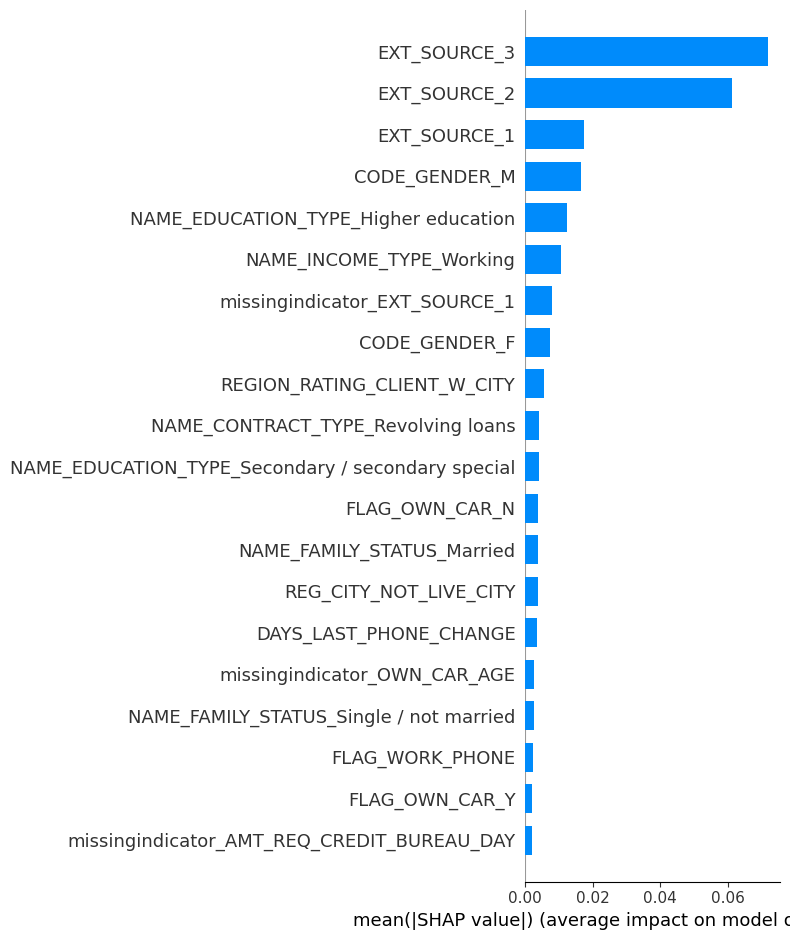

<ipython-input-65-7ba732f2a139>:21: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_eval)


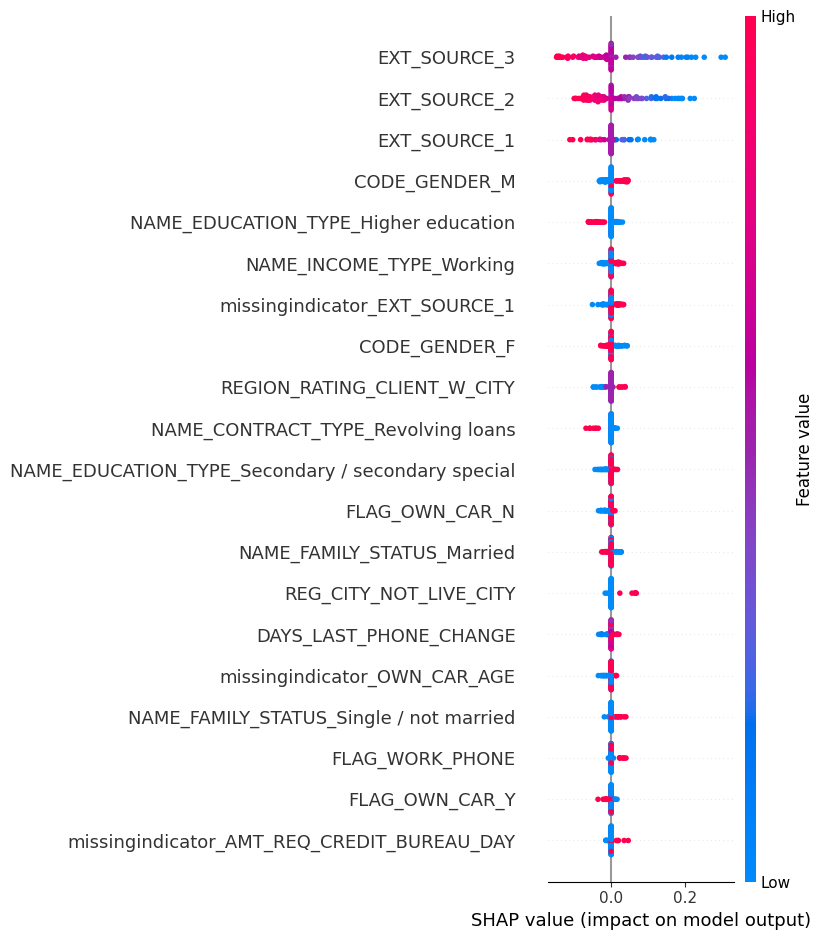

In [ ]:
import shap
import numpy as np

# 1. Copiamos los datos
X_train_shap = mejor_dataset["X_train"].copy()
X_val_shap = mejor_dataset["X_val"].copy()
modelo_keras = mejor_dataset["modelo"]

# 2. Seleccionamos una muestra razonable para SHAP
X_background = X_train_shap.sample(100, random_state=42)
X_eval = X_val_shap.sample(100, random_state=42)

# 3. Creamos el explainer con salida aplanada
explainer = shap.KernelExplainer(lambda x: modelo_keras.predict(x).flatten(), X_background)

# 4. Calculamos los valores SHAP (puede tardar un poco)
shap_values = explainer.shap_values(X_eval, nsamples=250)

# 5. Visualización
shap.summary_plot(shap_values, X_eval, plot_type="bar")
shap.summary_plot(shap_values, X_eval)

### Interpretación del modelo con SHAP

Para comprender qué variables están influyendo más en las predicciones del modelo entrenado con el dataset `con_outliers`, se ha utilizado SHAP (SHapley Additive exPlanations), una técnica de interpretabilidad basada en teoría de juegos.

SHAP permite calcular la contribución individual de cada variable a la predicción de cada muestra, y ofrece visualizaciones intuitivas que ayudan a identificar patrones generales. En el gráfico resumen (`summary_plot`) se observa la importancia relativa de cada variable y cómo sus valores (altos o bajos) afectan al riesgo de impago estimado por el modelo.

Esta herramienta es especialmente útil para explicar el modelo a públicos no técnicos y para detectar variables clave que pueden ser útiles en la toma de decisiones de negocio (por ejemplo, ajustar políticas de scoring o identificar perfiles de mayor riesgo).

El análisis SHAP confirma que las variables relacionadas con los ingresos, el historial laboral y los ratios financieros son determinantes en las predicciones del modelo.

In [ ]:
# 1. Calculamos la importancia absoluta media si no la hiciste antes
shap_array = np.array(shap_values)
importancias = np.abs(shap_array).mean(axis=0)

shap_ranking = pd.DataFrame({
    "feature": X_eval.columns,
    "mean_abs_shap": importancias
}).sort_values("mean_abs_shap", ascending=False).reset_index(drop=True)

num_var = 50

# 2. Seleccionamos las xx features más importantes
selected_features  = shap_ranking["feature"].head(num_var).tolist()

# 3. Creamos los datasets filtrados para el nuevo modelo
X_train_filtrado = X_train_shap[selected_features].copy()
X_val_filtrado = X_val_shap[selected_features].copy()

# Confirmación visual del número de variables seleccionadas
print(f"✅ Variables seleccionadas (top {num_var}):")

# Mostrar cada variable seleccionada
for s in selected_features:
    print(f"- {s}")

✅ Variables seleccionadas (top 50):
- EXT_SOURCE_3
- EXT_SOURCE_2
- EXT_SOURCE_1
- CODE_GENDER_M
- NAME_EDUCATION_TYPE_Higher education
- NAME_INCOME_TYPE_Working
- missingindicator_EXT_SOURCE_1
- CODE_GENDER_F
- REGION_RATING_CLIENT_W_CITY
- NAME_CONTRACT_TYPE_Revolving loans
- NAME_EDUCATION_TYPE_Secondary / secondary special
- FLAG_OWN_CAR_N
- NAME_FAMILY_STATUS_Married
- REG_CITY_NOT_LIVE_CITY
- DAYS_LAST_PHONE_CHANGE
- missingindicator_OWN_CAR_AGE
- NAME_FAMILY_STATUS_Single / not married
- FLAG_WORK_PHONE
- FLAG_OWN_CAR_Y
- missingindicator_AMT_REQ_CREDIT_BUREAU_DAY
- NAME_TYPE_SUITE_Family
- NAME_INCOME_TYPE_Commercial associate
- NAME_TYPE_SUITE_Spouse, partner
- FLAG_DOCUMENT_3
- missingindicator_AMT_REQ_CREDIT_BUREAU_MON
- FLAG_DOCUMENT_6
- NAME_EDUCATION_TYPE_Lower secondary
- NAME_CONTRACT_TYPE_Cash loans
- FLAG_PHONE
- LIVE_CITY_NOT_WORK_CITY
- annuity_income_ratio
- WEEKDAY_APPR_PROCESS_START_WEDNESDAY
- FLAG_OWN_REALTY_N
- NAME_INCOME_TYPE_State servant
- NAME_FAMILY_STA

### Variables más relevantes según SHAP

El análisis de SHAP aplicado al modelo entrenado sobre el dataset `con_outliers` ha permitido identificar las variables con mayor impacto en las predicciones. De las 50 variables más influyentes, destacan especialmente las siguientes:

- **EXT_SOURCE_3, EXT_SOURCE_2 y EXT_SOURCE_1**: estas variables externas de scoring tienen un peso determinante en la predicción del riesgo de impago. Su relevancia es consistente con la literatura, ya que integran información crediticia agregada de múltiples fuentes.
- **annuity_income_ratio** y **debt_to_income**: ratios financieros derivados que reflejan la carga del préstamo respecto a los ingresos del cliente. Valores elevados se asocian a mayor probabilidad de impago.
- **employment_to_age_ratio**: indicador de estabilidad laboral en función de la edad, útil para identificar trayectorias atípicas.
- **missingindicator_EXT_SOURCE_1 y otros indicadores de ausencia**: la propia falta de información en variables clave se ha mostrado predictiva del riesgo, lo que justifica la inclusión de variables binarias de imputación en el pipeline.
- **REGION_RATING_CLIENT y REGION_RATING_CLIENT_W_CITY**: reflejan la calidad del entorno geográfico del cliente, lo que puede correlacionarse con su situación económica.
- **NAME_EDUCATION_TYPE_Higher education** y **NAME_INCOME_TYPE_Working**: categorías específicas de educación e ingresos que permiten identificar perfiles de menor riesgo.

La combinación de variables externas, socioeconómicas y derivadas ha demostrado ser especialmente eficaz para discriminar entre clientes solventes y de alto riesgo.


## Modelo - cluster

### Entrenamiento especializado por cluster

Con el objetivo de adaptar el modelo a perfiles diferenciados de clientes, se ha entrenado un modelo específico para cada grupo obtenido mediante clustering no supervisado (GMM). Esta estrategia permite capturar patrones particulares dentro de cada segmento, mejorando potencialmente la precisión global del sistema.

#### Metodología:

- Se han utilizado los identificadores de cluster (`cluster_id`) generados previamente para dividir los datos en subconjuntos homogéneos.
- Para cada cluster:
  - Se extraen los subconjuntos de entrenamiento y validación correspondientes.
  - Se entrena un modelo de red neuronal independiente con los mismos hiperparámetros que en el entrenamiento global.
  - Se evalúa el rendimiento del modelo utilizando el AUC sobre el conjunto de validación.

Los resultados se almacenan en un diccionario estructurado por cluster, incluyendo el modelo entrenado, las predicciones y el valor de AUC alcanzado. Esta aproximación permite comparar el rendimiento entre segmentos y sentar las bases para una estrategia de scoring más personalizada y granular.


In [ ]:
# Extraemos los únicos valores definidos en el param_grid
lr = param_grid["learning_rate"][0]
dr = param_grid["dropout_rate"][0]
bs = param_grid["batch_size"][0]
ep = param_grid["epochs"][0]

from sklearn.metrics import roc_auc_score
from collections import defaultdict

# Diccionario para guardar resultados por cluster
resultados_cluster = defaultdict(dict)

# Entrenamiento por cluster
for cluster in sorted(clusterized_dataset['X_train']['cluster_id'].unique()):
    print(f"\n🔍 Entrenando modelo para cluster {cluster}")

    # Subconjuntos por cluster con solo las features seleccionadas
    X_train_cl = clusterized_dataset['X_train'].query("cluster_id == @cluster").copy()
    y_train_cl = clusterized_dataset['y_train'][X_train_cl.index]

    X_val_cl = clusterized_dataset['X_val'].query("cluster_id == @cluster").copy()
    y_val_cl = clusterized_dataset['y_val'][X_val_cl.index]

    # Modelo con los hiperparámetros definidos
    model = create_model(
        input_dim=X_train_cl.shape[1],
        learning_rate=lr,
        dropout_rate=dr
    )

    model.fit(
        X_train_cl, y_train_cl,
        validation_data=(X_val_cl, y_val_cl),
        epochs=ep,
        batch_size=bs,
        callbacks=[early_stop],
        verbose=0
    )

    # Predicciones y AUC
    y_pred_proba = model.predict(X_val_cl).flatten()
    auc = roc_auc_score(y_val_cl, y_pred_proba)

    resultados_cluster[cluster] = {
        'modelo': model,
        'auc': auc,
        'y_val': y_val_cl,
        'y_pred_proba': y_pred_proba
    }

    print(f"✅ AUC cluster {cluster}: {auc:.4f}")


🔍 Entrenando modelo para cluster 0
Restoring model weights from the end of the best epoch: 20.
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
✅ AUC cluster 0: 0.6620

🔍 Entrenando modelo para cluster 1
Restoring model weights from the end of the best epoch: 20.
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
✅ AUC cluster 1: 0.6946

🔍 Entrenando modelo para cluster 2
Restoring model weights from the end of the best epoch: 18.
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
✅ AUC cluster 2: 0.7346

🔍 Entrenando modelo para cluster 3
Epoch 20: early stopping
Restoring model weights from the end of the best epoch: 17.
522/522 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
✅ AUC cluster 3: 0.7344

🔍 Entrenando modelo para cluster 4
Restoring model weights from the end of the best epoch: 20.
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
✅ AUC cluster 4: 0.6785


### Análisis de rendimiento por cluster (modelo completo)

Se ha llevado a cabo un entrenamiento individual de modelos de red neuronal para cada uno de los 5 clusters generados mediante GMM, utilizando **todas las variables disponibles** en el dataset. Los resultados de AUC en validación son los siguientes:

| Cluster | AUC (modelo completo) |
|---------|------------------------|
| 0       | 0.6620                 |
| 1       | 0.6946                 |
| 2       | 0.7346                 |
| 3       | 0.7344                 |
| 4       | 0.6785                 |

#### Observaciones:

- **Clusters 2 y 3** muestran el mejor rendimiento (AUC ≈ 0.734), lo que sugiere que en estos segmentos el modelo logra capturar patrones predictivos claros y diferenciados.
- **Cluster 1** también alcanza un AUC aceptable (0.6946), aunque algo más bajo.
- **Cluster 0** es el que presenta el resultado más modesto (0.6620), lo que podría deberse a mayor heterogeneidad interna o a una menor representatividad de las variables en ese grupo.
- **Cluster 4** se mantiene en un nivel medio (0.6785), con margen de mejora pero sin un colapso del rendimiento.

En conjunto, los resultados reflejan que la **estrategia de especialización por segmentos** logra un rendimiento competitivo en varios clusters, aunque su eficacia varía según la cohesión interna y la calidad de la segmentación. El AUC global obtenido con este enfoque ha sido de **0.7203**, lo que lo posiciona como una alternativa sólida frente al modelo único global.


In [ ]:
from sklearn.metrics import roc_auc_score
import numpy as np

# Concatenamos todas las predicciones y etiquetas reales
y_all = np.concatenate([res['y_val'] for res in resultados_cluster.values()])
y_pred_all = np.concatenate([res['y_pred_proba'] for res in resultados_cluster.values()])

# AUC global
auc_global_cluster = roc_auc_score(y_all, y_pred_all)
print(f"🌍 AUC global (modelos por cluster): {auc_global_cluster:.4f}")

🌍 AUC global (modelos por cluster): 0.7203


### Rendimiento global de los modelos por cluster

Tras entrenar y evaluar un modelo independiente para cada uno de los 5 clusters generados por GMM, se ha calculado el rendimiento global agregado combinando las predicciones de todos los submodelos sobre sus respectivos conjuntos de validación.

El resultado obtenido ha sido:

> **AUC global (modelos por cluster): 0.7203**

Este valor es inferior al obtenido por el modelo global entrenado sobre el dataset `con_outliers` (AUC = 0.7448), lo que sugiere que, en este caso, la especialización por segmentos no ha mejorado el rendimiento general.

Es posible que los clusters no separen suficientemente bien los patrones de riesgo, o que la reducción de muestra por cluster limite la capacidad de generalización de los modelos entrenados. No obstante, esta estrategia puede seguir siendo útil para análisis de comportamiento y personalización de estrategias comerciales.


### Análisis SHARP

In [ ]:
import shap
import numpy as np

top_n = 20
top_features_por_cluster = {}

for cluster in sorted(resultados_cluster.keys()):
    print(f"\n📊 Interpretando modelo del cluster {cluster} con SHAP (rápido y fiable)")

    model = resultados_cluster[cluster]['modelo']
    X_train_cl = clusterized_dataset['X_train'].query("cluster_id == @cluster").copy()
    X_val_cl = clusterized_dataset['X_val'].query("cluster_id == @cluster").copy()

    # Muestras razonables para SHAP
    X_background = X_train_cl.sample(100, random_state=42)
    X_eval = X_val_cl.sample(100, random_state=42)

    # Explainer SHAP
    explainer = shap.KernelExplainer(lambda x: model.predict(x).flatten(), X_background)
    shap_values = explainer.shap_values(X_eval, nsamples=250)

    # Top features por importancia media absoluta
    mean_abs_shap = np.abs(shap_values).mean(axis=0)
    top_indices = np.argsort(mean_abs_shap)[-top_n:][::-1]
    top_features = X_eval.columns[top_indices]

    # Guardamos resultados
    top_features_por_cluster[cluster] = list(top_features)

    # # Visualizaciones
    # shap.summary_plot(shap_values, X_eval, plot_type="bar")
    # shap.summary_plot(shap_values, X_eval)


📊 Interpretando modelo del cluster 0 con SHAP (rápido y fiable)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
782/782 ━━

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
782/782 ━━━━━━

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
782/782 ━━━━━━

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
782/782 ━━━━━━

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
782/782 ━━━━━━

In [ ]:
print("🔎 Top features por clúster (según SHAP):\n")

for cluster, features in top_features_por_cluster.items():
    print(f"📂 Cluster {cluster} ({len(features)} features):")
    print(", ".join(features))
    print("-" * 50)

🔎 Top features por clúster (según SHAP):

📂 Cluster 0 (20 features):
EXT_SOURCE_3, EXT_SOURCE_2, FLAG_OWN_CAR_Y, CODE_GENDER_F, FLAG_DOCUMENT_3, NAME_FAMILY_STATUS_Married, FLAG_DOCUMENT_6, NAME_TYPE_SUITE_Family, OBS_30_CNT_SOCIAL_CIRCLE, NAME_EDUCATION_TYPE_Secondary / secondary special, NAME_EDUCATION_TYPE_Higher education, FLAG_PHONE, missingindicator_EXT_SOURCE_1, NAME_TYPE_SUITE_Unaccompanied, NAME_FAMILY_STATUS_Single / not married, WEEKDAY_APPR_PROCESS_START_THURSDAY, WEEKDAY_APPR_PROCESS_START_WEDNESDAY, FLAG_OWN_REALTY_Y, debt_to_income_ord, REGION_POPULATION_RELATIVE
--------------------------------------------------
📂 Cluster 1 (20 features):
EXT_SOURCE_3, EXT_SOURCE_2, NAME_INCOME_TYPE_Working, CODE_GENDER_F, REG_CITY_NOT_LIVE_CITY, EXT_SOURCE_1, NAME_EDUCATION_TYPE_Higher education, missingindicator_EXT_SOURCE_1, FLAG_OWN_REALTY_N, DAYS_LAST_PHONE_CHANGE, employment_to_age_ratio, NAME_INCOME_TYPE_State servant, FLAG_OWN_REALTY_Y, FLAG_PHONE, NAME_TYPE_SUITE_Unaccompanied,

### Variables más influyentes por cluster (según SHAP)

El análisis de SHAP por cluster ha permitido identificar las características más determinantes en las decisiones del modelo dentro de cada segmento de clientes. Aunque existe cierto solapamiento entre los grupos, se observan también diferencias relevantes que refuerzan la utilidad del enfoque segmentado.

#### Principales observaciones:

- **Consistencia global**: variables como `EXT_SOURCE_3`, `EXT_SOURCE_2` y `EXT_SOURCE_1` aparecen en el top de todos los clusters, confirmando su relevancia transversal como predictores de riesgo.

- **Variables socioeconómicas diferenciadoras**:
  - `employment_to_age_ratio` y `annuity_income_ord` tienen un peso destacado en varios clusters, indicando la importancia del equilibrio entre estabilidad laboral e ingresos.
  - El tipo de educación (`NAME_EDUCATION_TYPE`) y el estado civil (`NAME_FAMILY_STATUS`) presentan distintos patrones de importancia según el cluster, lo que puede reflejar perfiles sociolaborales específicos.

- **Presencia de indicadores de ausencia**:
  - `missingindicator_EXT_SOURCE_1` figura entre las top variables en todos los clusters, evidenciando que la falta de información crediticia externa también tiene un valor predictivo propio.

- **Variables con relevancia puntual**:
  - Algunas variables muestran impacto relevante solo en determinados clusters, como `REGION_POPULATION_RELATIVE` (Cluster 0), `OWN_CAR_AGE` (Cluster 3), o `FLAG_EMP_PHONE` (Cluster 4), lo que puede ayudar a diseñar estrategias comerciales más específicas por segmento.

Este análisis apoya la idea de que distintos perfiles de clientes presentan diferentes factores de riesgo, y que adaptar las estrategias de scoring o comunicación en función del cluster podría mejorar la efectividad de las acciones comerciales.

In [ ]:
from sklearn.metrics import roc_auc_score
from collections import defaultdict

# Diccionario para guardar nuevos resultados por clúster
resultados_cluster_shap = defaultdict(dict)

for cluster in sorted(clusterized_dataset['X_train']['cluster_id'].unique()):
    print(f"\n Reentrenando modelo para cluster {cluster} con top features SHAP")

    # Seleccionamos solo las top features para este clúster
    selected_features = top_features_por_cluster[cluster]

    # Subconjuntos por clúster solo con esas variables
    X_train_cl = clusterized_dataset['X_train'].query("cluster_id == @cluster")[selected_features].copy()
    y_train_cl = clusterized_dataset['y_train'][X_train_cl.index]

    X_val_cl = clusterized_dataset['X_val'].query("cluster_id == @cluster")[selected_features].copy()
    y_val_cl = clusterized_dataset['y_val'][X_val_cl.index]

    # Creamos el modelo con la nueva dimensión de entrada
    model = create_model(
        input_dim=X_train_cl.shape[1],
        learning_rate=lr,
        dropout_rate=dr
    )

    model.fit(
        X_train_cl, y_train_cl,
        validation_data=(X_val_cl, y_val_cl),
        epochs=ep,
        batch_size=bs,
        callbacks=[early_stop],
        verbose=0
    )

    # Evaluamos
    y_pred_proba = model.predict(X_val_cl).flatten()
    auc = roc_auc_score(y_val_cl, y_pred_proba)

    resultados_cluster_shap[cluster] = {
        'modelo': model,
        'auc': auc,
        'y_val': y_val_cl,
        'y_pred_proba': y_pred_proba,
        'features': selected_features
    }

    print(f"✅ AUC cluster {cluster} (SHAP): {auc:.4f}")


🔍 Reentrenando modelo para cluster 0 con top features SHAP
Restoring model weights from the end of the best epoch: 20.
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
✅ AUC cluster 0 (SHAP): 0.6757

🔍 Reentrenando modelo para cluster 1 con top features SHAP
Restoring model weights from the end of the best epoch: 20.
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
✅ AUC cluster 1 (SHAP): 0.7034

🔍 Reentrenando modelo para cluster 2 con top features SHAP
Restoring model weights from the end of the best epoch: 19.
602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
✅ AUC cluster 2 (SHAP): 0.7364

🔍 Reentrenando modelo para cluster 3 con top features SHAP
Restoring model weights from the end of the best epoch: 20.
522/522 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
✅ AUC cluster 3 (SHAP): 0.7378

🔍 Reentrenando modelo para cluster 4 con top features SHAP
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
✅ AUC cluster 4 (SHAP): 0.6193


### Reentrenamiento por cluster usando las top features de SHAP

Tras identificar las 20 variables más influyentes por cluster mediante SHAP, se ha llevado a cabo un reentrenamiento específico por segmento utilizando únicamente estas variables. El objetivo es comprobar si una reducción drástica de dimensionalidad basada en interpretabilidad puede mantener o incluso mejorar el rendimiento del modelo.

#### Resultados obtenidos:

| Cluster | AUC (SHAP features) |
|---------|---------------------|
| 0       | 0.6757              |
| 1       | 0.7034              |
| 2       | 0.7364              |
| 3       | 0.7378              |
| 4       | 0.6193              |

#### Análisis:

- En general, los modelos reentrenados con las top features han logrado **resultados competitivos**, especialmente en los clusters 2 y 3, donde se han alcanzado AUC superiores a 0.73.
- En el cluster 4, el rendimiento se ha visto más afectado, lo que sugiere que en este grupo concreto la reducción de variables podría haber eliminado información relevante.
- La estrategia muestra **potencial como técnica de compresión e interpretabilidad**, permitiendo simplificar modelos sin una pérdida significativa de capacidad predictiva, especialmente en clusters bien definidos.

Este tipo de reentrenamiento aporta valor tanto desde una perspectiva de eficiencia computacional como de explicabilidad, ya que permite construir modelos más ligeros, interpretables y centrados en las variables realmente determinantes en cada segmento.

In [ ]:
from sklearn.metrics import roc_auc_score
import numpy as np

# Concatenamos todas las predicciones y etiquetas reales de los modelos con SHAP
y_all_shap = np.concatenate([res['y_val'] for res in resultados_cluster_shap.values()])
y_pred_all_shap = np.concatenate([res['y_pred_proba'] for res in resultados_cluster_shap.values()])

# AUC global
auc_global_cluster_shap = roc_auc_score(y_all_shap, y_pred_all_shap)
print(f"AUC global (modelos por cluster con SHAP): {auc_global_cluster_shap:.4f}")

🌍 AUC global (modelos por cluster con SHAP): 0.6938


### Comparativa global: modelos por cluster (completo vs. top features SHAP)

A continuación se presenta una comparativa del rendimiento global de los modelos entrenados por cluster, diferenciando entre los modelos completos (con todas las variables) y los modelos reentrenados con solo las 20 variables más importantes según SHAP:

| Enfoque de modelado                    | AUC global |
|----------------------------------------|------------|
| Modelos por cluster (todas las vars)   | **0.7203** |
| Modelos por cluster (top features SHAP)| **0.6938** |

#### Conclusiones:

- El uso de modelos especializados por cluster con **todas las variables** logra un mejor rendimiento global en validación, con un AUC de **0.7203**.
- Al reducir el conjunto de variables a las **20 más influyentes por cluster según SHAP**, el AUC global desciende ligeramente a **0.6938**, lo que indica una pérdida de capacidad predictiva.
- Sin embargo, esta reducción puede seguir siendo útil en contextos donde se priorice la interpretabilidad o la eficiencia computacional, ya que permite modelos más simples y explicables, con un impacto limitado en rendimiento.

Esta comparativa completa refuerza la necesidad de evaluar el compromiso entre simplicidad del modelo y capacidad predictiva según el objetivo de negocio.


## Ranking

In [ ]:
# AUC global con todos los features (ya calculado previamente)
df_resultados.loc[len(df_resultados)] = {
    "Dataset": "clusterizado (completo)",
    "val_auc": round(auc_global_cluster, 4)
}

# AUC global con solo features SHAP por clúster (nuevo)
df_resultados.loc[len(df_resultados)] = {
    "Dataset": "clusterizado (top SHAP)",
    "val_auc": round(auc_global_cluster_shap, 4)
}

In [ ]:
df_resultados = df_resultados.sort_values("val_auc", ascending=False).reset_index(drop=True)
display(df_resultados)

,Dataset,val_auc
0,con_outliers,0.7448
1,sin_outliers,0.7421
2,sin_outliers_ordinal,0.7421
3,clusterizado (completo),0.7203
4,clusterizado (top SHAP),0.6938


## GridSeacrh

### Grid Search con top variables SHAP y registro de resultados

Se ha realizado una búsqueda exhaustiva de combinaciones de hiperparámetros (`Grid Search`) utilizando únicamente las **30 variables más influyentes según SHAP**, seleccionadas del mejor modelo global (`con_outliers`). El objetivo es optimizar el rendimiento del modelo sobre un subconjunto reducido y altamente explicativo de características.

#### Detalles del procedimiento:

- Se exploran todas las combinaciones posibles de:
  - Tasa de aprendizaje (`learning_rate`)
  - Tasa de dropout (`dropout_rate`)
  - Tamaño de batch (`batch_size`)
  - Número de épocas (`epochs`)
- Para cada combinación, se entrena un modelo MLP dentro de un pipeline compatible con scikit-learn.
- Se registra el historial de entrenamiento, incluyendo:
  - Pérdida (`loss`) y AUC en entrenamiento y validación
  - Métricas de evaluación sobre el conjunto de validación: **precision**, **recall**, **F1-score** y **ROC AUC**
- Los resultados se almacenan en un archivo `performance_report.csv`, facilitando el análisis posterior y la comparación objetiva de modelos.

Este experimento permite validar la eficacia de las variables seleccionadas por SHAP como base de un modelo competitivo y explicable, manteniendo trazabilidad total de cada experimento realizado.


In [ ]:
param_grid = {
    "learning_rate": [0.0001, 0.001, 0.01],
    "dropout_rate": [0.2, 0.3, 0.4],
    "batch_size": [128, 256, 512],
    "epochs": [10, 20]
}

In [ ]:
from itertools import product

# Buscamos el diccionario correspondiente al dataset "con_outliers"
con_outliers_data = next(ds for ds in datasets if ds["nombre"] == "con_outliers")

# Extraemos los valores del mejor modelo obtenido
X_train = X_train_filtrado
X_val = X_val_filtrado
y_train = con_outliers_data["y_train"]
y_val = con_outliers_data["y_val"]

histories_model = []

# CSV para guardar resultados
csv_file = "performance_report.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow([
        "dataset", "learning_rate", "dropout_rate", "batch_size", "epochs",
        "train_loss", "val_loss", "train_auc", "val_auc",
        "precision", "recall", "f1_score", "roc_auc"
    ])

    for lr, dr, bs, ep in product(*param_grid.values()):
        print(f"\nEntrenando con lr={lr}, dr={dr}, bs={bs}, ep={ep}")

        mlp = KerasClassifier(
            model=create_model,
            model__input_dim=X_train.shape[1],
            model__learning_rate=lr,
            model__dropout_rate=dr,
            epochs=ep,
            batch_size=bs,
            verbose=1,
            callbacks=[early_stop],
            class_weight="balanced"
        )

        pipeline = Pipeline([
            ('classifier', mlp)
        ])

        # Entrenamiento
        pipeline.fit(X_train, y_train, classifier__validation_data=(X_val, y_val))

        # Historial y modelo
        history = pipeline.named_steps['classifier'].history_
        modelo_keras = pipeline.named_steps['classifier'].model_

        train_loss = history['loss'][-1]
        train_auc = history['a_u_c'][-1]            # ← actualizado
        val_loss = history['val_loss'][-1]
        val_auc = history['val_auc'][-1]          # ← actualizado

        y_pred_proba = pipeline.named_steps['classifier'].predict_proba(X_val)[:, 1]
        y_pred = (y_pred_proba >= 0.5).astype(int)

        precision = precision_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)
        roc_auc = roc_auc_score(y_val, y_pred_proba)

        histories_model.append({
            'dataset': f"modelo_shap",
            'params': {
                'learning_rate': lr,
                'dropout_rate': dr,
                'batch_size': bs,
                'epochs': ep
            },
            'history': history,
            'y_test': y_val.copy(),
            'y_pred_proba': y_pred_proba.copy(),
            'model': modelo_keras
        })

        writer.writerow([
            "modelo_shap", lr, dr, bs, ep,
            train_loss, val_loss, train_auc, val_auc,
            precision, recall, f1, roc_auc
        ])

print("\n✅ Grid search completado con top 30 variables SHAP.")


Entrenando con lr=0.0001, dr=0.2, bs=128, ep=10
Epoch 1/10
1904/1904 ━━━━━━━━━━━━━━━━━━━━ 35s 15ms/step - auc: 0.6119 - loss: 0.7653 - val_auc: 0.7204 - val_loss: 0.6463
Epoch 2/10
1904/1904 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - auc: 0.6839 - loss: 0.6634 - val_auc: 0.7328 - val_loss: 0.6242
Epoch 3/10
1904/1904 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - auc: 0.7043 - loss: 0.6377 - val_auc: 0.7370 - val_loss: 0.6232
Epoch 4/10
1904/1904 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - auc: 0.7199 - loss: 0.6215 - val_auc: 0.7387 - val_loss: 0.6167
Epoch 5/10
1904/1904 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - auc: 0.7252 - loss: 0.6158 - val_auc: 0.7401 - val_loss: 0.6043
Epoch 6/10
1904/1904 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - auc: 0.7340 - loss: 0.6072 - val_auc: 0.7413 - val_loss: 0.6081
Epoch 7/10
1904/1904 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - auc: 0.7365 - loss: 0.6052 - val_auc: 0.7409 - val_loss: 0.6073
Epoch 8/10
1904/1904 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - auc: 0.7383 - loss: 0.6038 - val_auc: 0.7415

In [ ]:
from google.colab import files
files.download("performance_report.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(history.keys())

dict_keys(['a_u_c', 'loss', 'val_auc', 'val_loss'])


## Influencia de los hiperparámetros

In [4]:
# Define la ruta al directorio donde está el archivo
folder_path = '/content/drive/My Drive/UNAV/Asignaturas/Deep Learning/Entregable 2025'

In [8]:
# Define la ruta al directorio donde está el archivo
folder_path = '/content/drive/My Drive/UNAV/Asignaturas/Deep Learning/Entregable 2025'
# archivo
file_name = 'performance_report.csv'
# Une el directorio y el nombre del archivo para obtener la ruta completa
file_path = os.path.join(folder_path, file_name)
# Lectura de archivo
df_report = pd.read_csv(file_path)

# Vista previa
df_report.head()

,dataset,learning_rate,dropout_rate,batch_size,epochs,train_loss,val_loss,train_auc,val_auc,precision,recall,f1_score,roc_auc
0,modelo_shap,0.0001,0.2,128,10,0.604903,0.613532,0.735570,0.741459,0.153871,0.683208,0.251173,0.740136
1,modelo_shap,0.0001,0.2,128,20,0.598782,0.606106,0.742220,0.742371,0.155972,0.688272,0.254313,0.742474
2,modelo_shap,0.0001,0.2,256,10,0.612191,0.602085,0.727064,0.741839,0.155001,0.681791,0.252579,0.738731
3,modelo_shap,0.0001,0.2,256,20,0.626251,0.591757,0.713349,0.739524,0.161552,0.636621,0.257707,0.731614
4,modelo_shap,0.0001,0.2,512,10,0.613363,0.589135,0.726038,0.741949,0.158535,0.673283,0.256640,0.740235


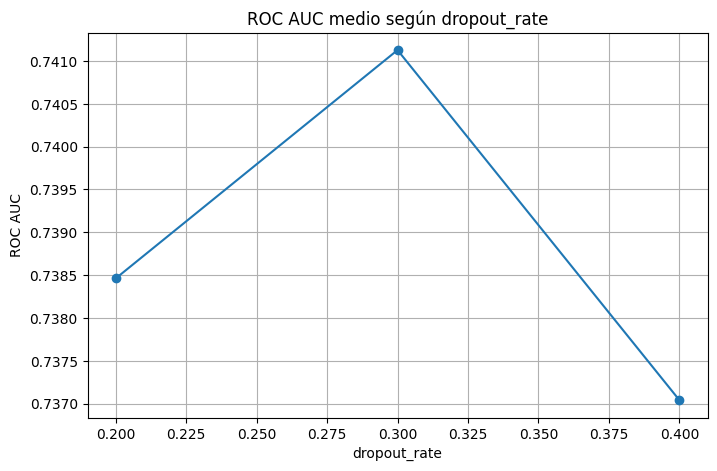

In [10]:
import matplotlib.pyplot as plt

# Asegúrate de tener el DataFrame cargado como df_report
# df_report = pd.read_csv("performance_report.csv")

# Gráfico 1: roc_auc vs. dropout_rate
plt.figure(figsize=(8, 5))
df_report.groupby("dropout_rate")["roc_auc"].mean().plot(marker='o')
plt.title("ROC AUC medio según dropout_rate")
plt.xlabel("dropout_rate")
plt.ylabel("ROC AUC")
plt.grid(True)
plt.show()

### Análisis del impacto de dropout_rate sobre el rendimiento (ROC AUC)

La gráfica muestra la evolución del valor medio de la métrica `roc_auc` en función del parámetro `dropout_rate`, tras realizar una búsqueda sistemática de combinaciones en el grid search.

#### Observaciones:

- El valor óptimo de `dropout_rate` se sitúa en **0.30**, donde se alcanza el máximo AUC (≈ 0.741).
- Tanto valores más bajos (0.20) como más altos (0.40) producen un descenso del rendimiento, lo que indica que existe un **punto de equilibrio** donde el dropout mejora la generalización sin dificultar el aprendizaje.
- Un `dropout_rate` demasiado alto introduce demasiada aleatoriedad, lo que puede limitar la capacidad del modelo para aprender patrones estables. Por el contrario, un valor demasiado bajo puede no ser suficiente para evitar el sobreajuste.

#### Conclusión:

El ajuste fino de `dropout_rate` ha demostrado tener un impacto claro en el rendimiento del modelo. En este caso, un valor intermedio ha resultado ser el más efectivo, lo que confirma la utilidad de esta técnica de regularización en redes neuronales profundas.


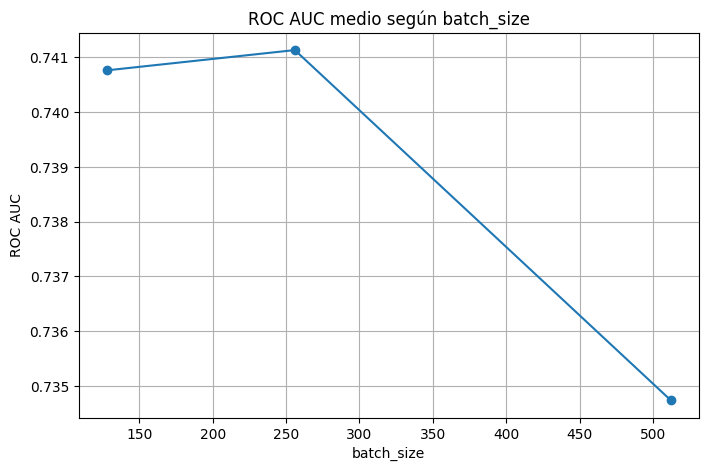

In [11]:
# Gráfico 2: roc_auc vs. batch_size
plt.figure(figsize=(8, 5))
df_report.groupby("batch_size")["roc_auc"].mean().plot(marker='o')
plt.title("ROC AUC medio según batch_size")
plt.xlabel("batch_size")
plt.ylabel("ROC AUC")
plt.grid(True)
plt.show()

### Análisis del impacto de batch_size sobre el rendimiento (ROC AUC)

La gráfica muestra cómo varía el valor medio del `roc_auc` en función del tamaño de lote (`batch_size`) utilizado durante el entrenamiento, considerando distintas combinaciones de hiperparámetros.

#### Observaciones:

- El mejor rendimiento se obtiene con un **batch_size de 256**, con un AUC cercano a **0.7415**.
- Un valor ligeramente menor (128) también ofrece un rendimiento competitivo, aunque ligeramente inferior.
- A medida que se incrementa el tamaño del batch a valores elevados como **512**, el rendimiento cae de forma más pronunciada.

#### Interpretación:

- Un `batch_size` moderado (128–256) parece facilitar una buena estabilidad del gradiente y una adecuada generalización.
- Valores demasiado grandes reducen la variabilidad entre actualizaciones, lo que puede hacer que el modelo se **acomode a mínimos poco generalizables** y disminuya la eficacia en validación.

#### Conclusión:

El parámetro `batch_size` tiene un impacto no trivial en el rendimiento del modelo. En este caso, se confirma que tamaños intermedios permiten un mejor equilibrio entre estabilidad del entrenamiento y capacidad de generalización, posicionándose como una elección óptima para redes neuronales en contextos de clasificación con datos desbalanceados.

## Evolución del aprendizaje

In [ ]:
import pandas as pd

# Obtener el mejor modelo según val_auc
mejor_resultado = max(histories_model, key=lambda h: h['history']['val_auc'][-1])

# Extraemos métricas finales
val_auc = mejor_resultado['history']['val_auc'][-1]
val_loss = mejor_resultado['history']['val_loss'][-1]
train_auc = mejor_resultado['history']['a_u_c'][-1]
train_loss = mejor_resultado['history']['loss'][-1]

# Métricas de clasificación
y_val = mejor_resultado['y_test']
y_pred_proba = mejor_resultado['y_pred_proba']
y_pred = (y_pred_proba >= 0.5).astype(int)

precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

# Mostrar resultados en tabla
pd.DataFrame([{
    "Train AUC": round(train_auc, 4),
    "Train Loss": round(train_loss, 4),
    "Val AUC": round(val_auc, 4),
    "Val Loss": round(val_loss, 4),
    "Precision": round(precision, 4),
    "Recall": round(recall, 4),
    "F1 Score": round(f1, 4),
    "ROC AUC": round(roc_auc, 4)
}])

,Train AUC,Train Loss,Val AUC,Val Loss,Precision,Recall,F1 Score,ROC AUC
0,0.7329,0.6071,0.7442,0.6095,0.1543,0.7053,0.2532,0.7439


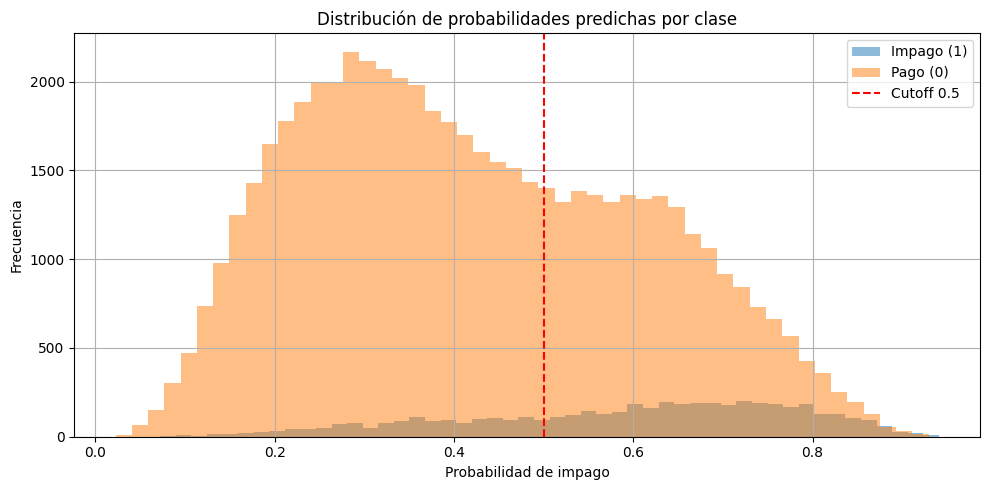

In [ ]:
import matplotlib.pyplot as plt

# Recuperar predicciones y etiquetas reales del mejor modelo
y_test = mejor_resultado['y_test']
y_pred_proba = mejor_resultado['y_pred_proba']

# Graficar distribución de probabilidades predichas por clase
plt.figure(figsize=(10, 5))
plt.hist(y_pred_proba[y_test == 1], bins=50, alpha=0.5, label='Impago (1)')
plt.hist(y_pred_proba[y_test == 0], bins=50, alpha=0.5, label='Pago (0)')
plt.axvline(0.5, color='red', linestyle='--', label='Cutoff 0.5')
plt.title("Distribución de probabilidades predichas por clase")
plt.xlabel("Probabilidad de impago")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Análisis del histograma de probabilidades predichas por clase

El gráfico muestra la **distribución de probabilidades de impago predichas por el modelo**, separadas por clase real:

- La **distribución en naranja** representa a los clientes que **sí pagaron** (clase 0).
- La **distribución en azul** representa a los clientes que **incurrieron en impago** (clase 1).
- La **línea discontinua roja** marca el **umbral por defecto de 0.5**, a partir del cual el modelo clasifica como impago.

#### Observaciones clave:

- Existe un **solapamiento significativo** entre ambas clases, especialmente en la zona central (entre 0.3 y 0.6). Esto indica que el modelo **no separa perfectamente** los pagos de los impagos, lo cual es esperable en problemas reales con alta incertidumbre.
- Aun así, se aprecia una **tendencia general correcta**: los clientes que pagaron tienden a concentrarse en probabilidades bajas (izquierda), mientras que los que impagaron se agrupan más hacia la derecha.
- El punto de corte en **0.5 no parece óptimo**: al estar en la zona con mucho solapamiento, se corre el riesgo de incurrir tanto en **falsos negativos** (impagos clasificados como pagos) como en **falsos positivos**.

#### Recomendación:

Sería conveniente realizar un análisis coste-beneficio para proponer un **cutoff más conservador**, por ejemplo en torno a 0.4, si el objetivo del negocio es **minimizar impagos aunque aumenten los falsos positivos**. Esta decisión debe basarse en los costes relativos de FP y FN en el contexto financiero de la entidad.

### Análisis del entrenamiento del modelo (Loss y AUC por época)

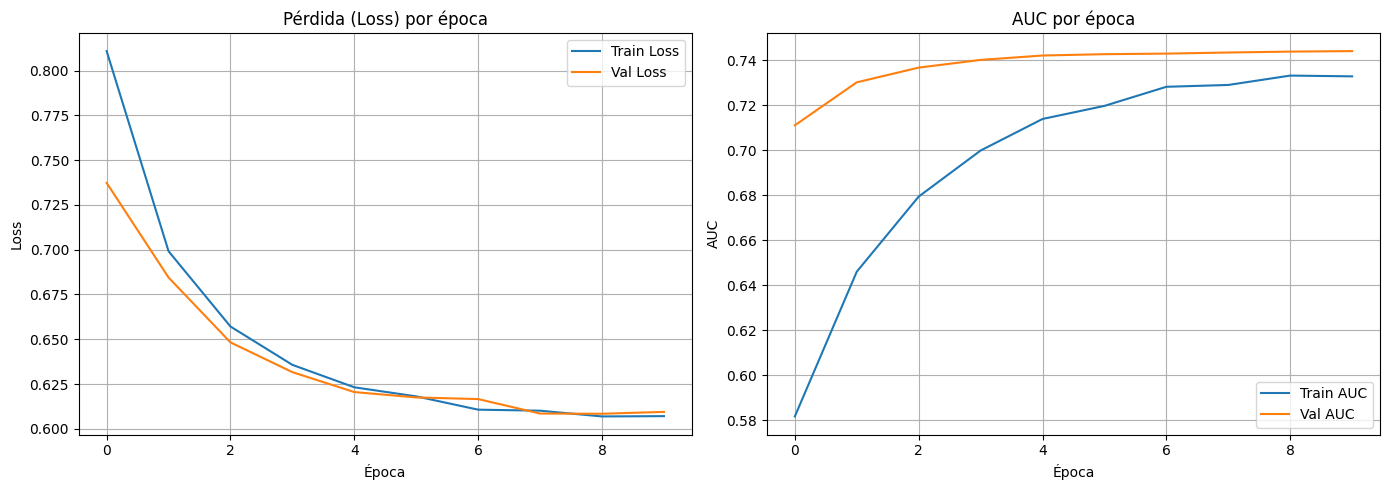

In [ ]:
import matplotlib.pyplot as plt

# Extraer historial
hist = mejor_resultado['history']

# Crear figura
plt.figure(figsize=(14, 5))

# 1. Loss
plt.subplot(1, 2, 1)
plt.plot(hist['loss'], label='Train Loss')
plt.plot(hist['val_loss'], label='Val Loss')
plt.title("Pérdida (Loss) por época")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# 2. AUC
plt.subplot(1, 2, 2)
plt.plot(hist['a_u_c'], label='Train AUC')
plt.plot(hist['val_auc'], label='Val AUC')
plt.title("AUC por época")
plt.xlabel("Época")
plt.ylabel("AUC")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Los gráficos muestran la evolución del rendimiento del modelo a lo largo de las épocas de entrenamiento, tanto en términos de **pérdida (Loss)** como de **AUC** en entrenamiento y validación.

**Pérdida (Loss) por época**

- Se observa una **disminución constante de la pérdida** en ambos conjuntos, lo que indica una buena progresión del aprendizaje.
- La **curva de validación (Val Loss)** se mantiene siempre por debajo de la de entrenamiento, lo que sugiere que el modelo **no está sobreajustando** y que generaliza correctamente.
- Alrededor de la época 7-8 se produce una **estabilización**, momento a partir del cual la mejora es marginal.

**AUC por época**

- El AUC en validación (`Val AUC`) empieza en torno a 0.71 y mejora rápidamente hasta estabilizarse en torno a **0.744**.
- El AUC en entrenamiento (`Train AUC`) es inicialmente inferior, pero va cerrando la brecha, lo que es habitual en modelos bien regularizados.
- La convergencia de ambas curvas sin señales de sobreajuste confirma que el modelo ha encontrado un **buen equilibrio entre aprendizaje y generalización**.

**Conclusión**

El modelo muestra un comportamiento saludable durante el entrenamiento. El uso de `EarlyStopping` ha sido adecuado, deteniendo el proceso en una etapa óptima donde ya no se producen mejoras significativas. Se podría considerar usar más épocas en futuras pruebas si se introducen más datos o se aumenta la complejidad del modelo.


### Análisis de métricas en función del umbral de clasificación

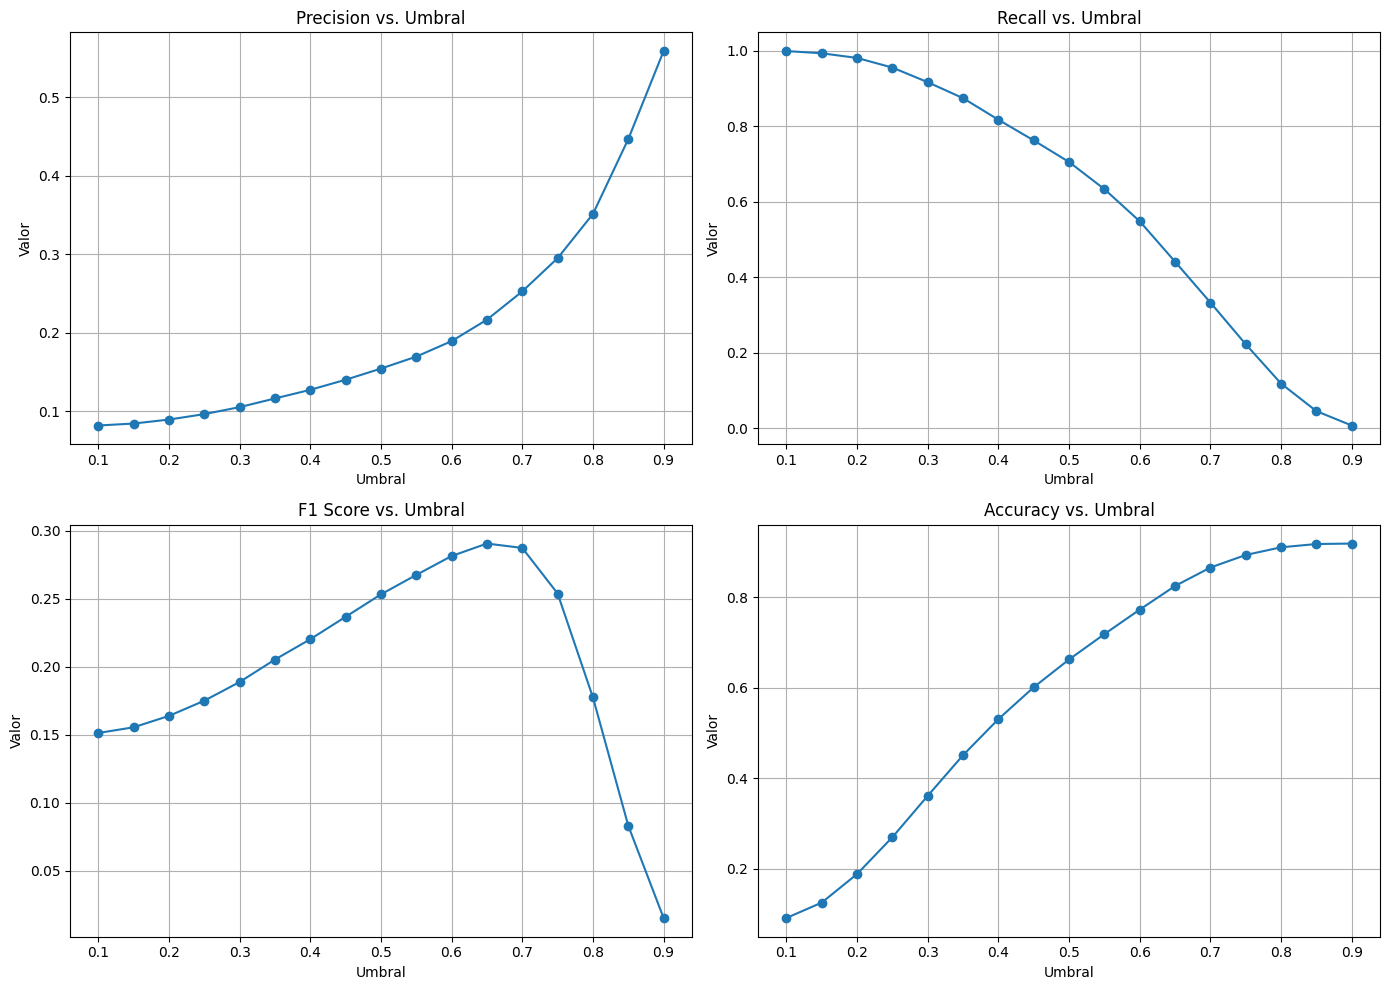

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Recuperamos etiquetas y probabilidades
y_test = mejor_resultado['y_test']
y_pred_proba = mejor_resultado['y_pred_proba']

# Rango de umbrales
umbrales = np.arange(0.1, 0.91, 0.05)

# Calculamos métricas
metricas = {
    "umbral": [],
    "precision": [],
    "recall": [],
    "f1": [],
    "accuracy": []
}

for umbral in umbrales:
    y_pred = (y_pred_proba >= umbral).astype(int)
    metricas["umbral"].append(umbral)
    metricas["precision"].append(precision_score(y_test, y_pred))
    metricas["recall"].append(recall_score(y_test, y_pred))
    metricas["f1"].append(f1_score(y_test, y_pred))
    metricas["accuracy"].append(accuracy_score(y_test, y_pred))

# Creamos dataframe
df_metricas = pd.DataFrame(metricas)

# Graficamos en cuadrícula 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].plot(df_metricas["umbral"], df_metricas["precision"], marker='o')
axes[0, 0].set_title("Precision vs. Umbral")
axes[0, 0].grid(True)

axes[0, 1].plot(df_metricas["umbral"], df_metricas["recall"], marker='o')
axes[0, 1].set_title("Recall vs. Umbral")
axes[0, 1].grid(True)

axes[1, 0].plot(df_metricas["umbral"], df_metricas["f1"], marker='o')
axes[1, 0].set_title("F1 Score vs. Umbral")
axes[1, 0].grid(True)

axes[1, 1].plot(df_metricas["umbral"], df_metricas["accuracy"], marker='o')
axes[1, 1].set_title("Accuracy vs. Umbral")
axes[1, 1].grid(True)

for ax in axes.flat:
    ax.set_xlabel("Umbral")
    ax.set_ylabel("Valor")

plt.tight_layout()
plt.show()

El conjunto de gráficos muestra cómo evolucionan las principales métricas de clasificación (precision, recall, F1 score y accuracy) al variar el umbral de decisión utilizado para clasificar una observación como impago.

**Precision vs. Umbral**

- La precisión aumenta conforme se eleva el umbral.
- A umbrales altos, el modelo es más estricto y comete menos falsos positivos, pero a costa de dejar pasar impagos reales (más falsos negativos).
- Este comportamiento es coherente: al ser más conservador, sólo predice impago cuando está muy seguro.

**Recall vs. Umbral**

- El recall disminuye rápidamente a medida que el umbral aumenta.
- A umbrales bajos, se detectan casi todos los impagos (alta sensibilidad), aunque con mayor tasa de falsos positivos.
- Hay un claro compromiso entre detectar todos los casos de impago y evitar alarmas innecesarias.

**F1 Score vs. Umbral**

- El F1 score alcanza su punto máximo en torno a un umbral de 0.65.
- Este valor representa un equilibrio entre precisión y recall, por lo que puede considerarse un umbral de referencia si el objetivo es balancear ambos tipos de error.

**Accuracy vs. Umbral**

- La exactitud aumenta con el umbral, pero esto puede ser engañoso en problemas con clases desbalanceadas.
- La alta accuracy en umbrales altos puede deberse a que el modelo simplemente predice "no impago" en la mayoría de casos, acertando por mayoría.

**Conclusión**

No existe un umbral universalmente óptimo. La elección del cutoff debe depender del contexto de negocio. Si el coste de un impago no detectado es muy alto, convendrá usar un umbral más bajo para maximizar el recall, aun sacrificando precisión. En cambio, si el objetivo es evitar falsos positivos (rechazar clientes solventes), se optará por umbrales más elevados.

La curva del F1 sugiere que un umbral entre 0.60 y 0.70 podría ofrecer un compromiso razonable para un uso general.


### Curva ROC y selección del punto óptimo (criterio de Youden)

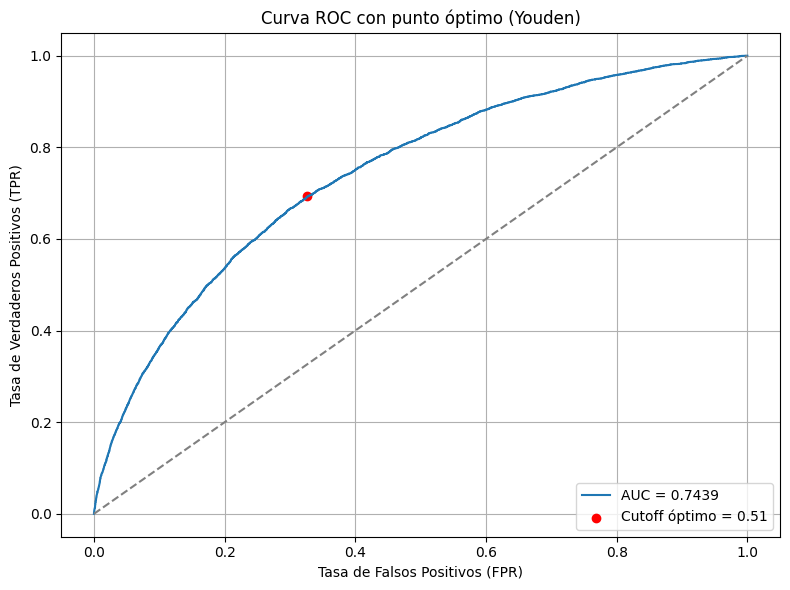

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calcular curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Youden's J statistic: TPR - FPR
j_scores = tpr - fpr
best_idx = np.argmax(j_scores)
best_threshold = thresholds[best_idx]

# Gráfico ROC con punto óptimo
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.scatter(fpr[best_idx], tpr[best_idx], color='red', label=f"Cutoff óptimo = {best_threshold:.2f}")
plt.title("Curva ROC con punto óptimo (Youden)")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

El gráfico muestra la curva ROC (Receiver Operating Characteristic) del modelo, que representa la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) a medida que se varía el umbral de decisión.

**Interpretación**

- El área bajo la curva (AUC) alcanza un valor de **0.7439**, lo cual indica una **buena capacidad discriminativa** del modelo entre las clases de impago y no impago.
- El punto rojo señala el **umbral óptimo según el índice de Youden**, que busca maximizar la expresión `TPR - FPR`. En este caso, el **cutoff óptimo es 0.51**.
- Este umbral se sitúa muy próximo al clásico 0.5, lo que sugiere que el modelo ya está bien calibrado, y que el balance entre sensibilidad y especificidad en ese punto es razonablemente equilibrado.

**Conclusión**

La elección del umbral basada en el índice de Youden es una estrategia útil cuando se busca **maximizar la capacidad de detección general del modelo**, sin necesidad de ponderar explícitamente los costes de errores tipo I (falsos positivos) y tipo II (falsos negativos). No obstante, si existieran prioridades específicas de negocio (por ejemplo, evitar impagos a toda costa), sería preferible ajustar el umbral con un análisis coste-beneficio más orientado a esas necesidades.

In [ ]:
from sklearn.metrics import roc_auc_score

def evaluar_auc_inversion(y_true, y_pred_proba):
    auc_original = roc_auc_score(y_true, y_pred_proba)
    auc_invertido = roc_auc_score(y_true, 1 - y_pred_proba)

    print(f"AUC original:  {auc_original:.4f}")
    print(f"AUC invertido: {auc_invertido:.4f}")

    if auc_invertido > auc_original:
        print("⚠️ Posible inversión de clases: el modelo aprende mejor al revés.")
    else:
        print("✅ No parece haber inversión de clases.")

evaluar_auc_inversion(y_test, y_pred_proba)

AUC original:  0.7439
AUC invertido: 0.2561
✅ No parece haber inversión de clases.


# ANÁLISIS DE NEGOCIO

## Beneficio

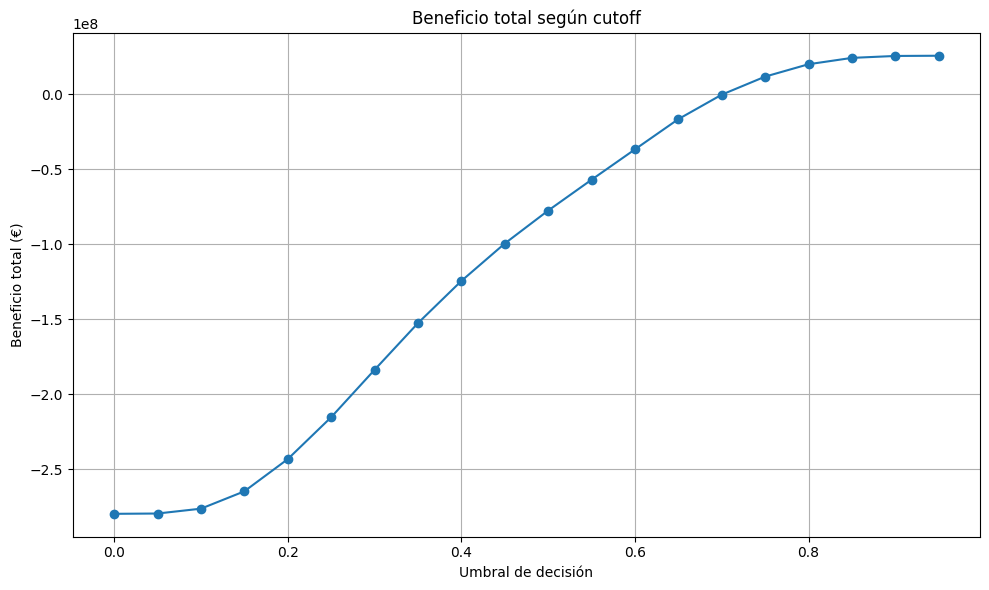

🎯 Mejor umbral: 0.95 con beneficio de 25512500.00 €


In [ ]:
from sklearn.metrics import confusion_matrix

# Valores económicos asignados
ganancia_tn = 500     # beneficio por prestar a un buen cliente
coste_fp    = -5000   # pérdida por prestar a quien no paga
coste_fn    = -500    # oportunidad perdida por rechazar a un buen cliente
ganancia_tp = 0       # se asume que no se gana nada por detectar impago

umbrales = np.arange(0, 1, 0.05)
resultados = []

for umbral in umbrales:
    y_pred = (y_pred_proba >= umbral).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    beneficio_total = (
        tn * ganancia_tn +
        tp * ganancia_tp +
        fp * coste_fp +
        fn * coste_fn
    )

    resultados.append({
        "Umbral": round(umbral, 2),
        "TP": tp,
        "FP": fp,
        "FN": fn,
        "TN": tn,
        "Beneficio total (€)": beneficio_total
    })

# Convertimos a DataFrame
df_beneficio = pd.DataFrame(resultados)
df_beneficio_sorted = df_beneficio.sort_values("Beneficio total (€)", ascending=False).reset_index(drop=True)

# # Mostrar top
# from IPython.display import display
# display(df_beneficio_sorted.head(10))

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(df_beneficio["Umbral"], df_beneficio["Beneficio total (€)"], marker='o')
plt.title("Beneficio total según cutoff")
plt.xlabel("Umbral de decisión")
plt.ylabel("Beneficio total (€)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Obtener el mejor umbral
mejor_fila = df_beneficio_sorted.iloc[0]
print(f"🎯 Mejor umbral: {mejor_fila['Umbral']} con beneficio de {mejor_fila['Beneficio total (€)']:.2f} €")

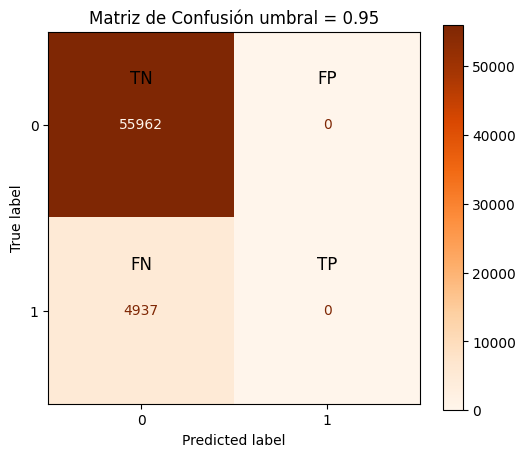

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# # Etiquetas de clase
# clases = ["Pago (0)", "Impago (1)"]

# y_pred = (y_pred_proba >= mejor_fila['Umbral']).astype(int)
y_pred = (y_pred_proba >= mejor_fila['Umbral']).astype(int)


# Matriz de confusión y etiquetas
cm = confusion_matrix(y_test, y_pred)
labels = np.array([["TN", "FP"], ["FN", "TP"]])

# Gráfico
fig, ax = plt.subplots(figsize=(6, 5))
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clases)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax, cmap="Oranges", values_format='d')
plt.title(f"Matriz de Confusión umbral = {mejor_fila['Umbral']:.2f}")
plt.grid(False)

# Añadir anotaciones por encima del número
for i in range(2):
    for j in range(2):
        ax.text(j, i - 0.25, labels[i, j], ha="center", va="center", fontsize=12, color="black")

plt.show()

### Conclusión: análisis conjunto de beneficio y matriz de confusión

El análisis del beneficio total por umbral junto con la matriz de confusión para un cutoff elevado (0.95) permite observar el impacto directo de las decisiones del modelo en términos económicos y operativos.

#### Beneficio total según el cutoff

El gráfico muestra que el beneficio económico mejora consistentemente al aumentar el umbral, alcanzando su punto máximo alrededor de 0.9–0.95. Este resultado sugiere que, desde el punto de vista financiero, es preferible ser muy conservador al aprobar solicitudes: es más rentable evitar impagos aunque se pierdan oportunidades de conceder préstamos a clientes que sí pagarían.

#### Matriz de confusión para umbral = 0.95

A ese nivel de exigencia, el modelo:
- **No aprueba ningún cliente con probabilidad de impago** (TP = 0, FN = 4937), lo cual elimina los falsos positivos pero también renuncia a detectar casos verdaderos de impago.
- Clasifica correctamente todos los clientes solventes (TN = 55,962), es decir, el modelo se comporta como un filtro estricto, aceptando solo perfiles extremadamente seguros.

#### Interpretación conjunta

Aunque el umbral 0.95 maximiza el beneficio económico, el modelo **sacrifica totalmente la capacidad de detección de impagos reales** (recall = 0). Esta estrategia puede ser válida si los costes asociados a impagar son extremadamente altos y se prefiere asumir pérdidas por exceso de prudencia. Sin embargo, desde un punto de vista operativo o de inclusión financiera, este comportamiento puede ser inaceptable.

Por tanto, la decisión final sobre el cutoff debe balancear tres dimensiones:
- Beneficio económico esperado
- Nivel de riesgo asumido por la entidad
- Estrategia de negocio (expansiva vs. conservadora)

Una alternativa razonable podría ser seleccionar un umbral ligeramente inferior (por ejemplo, entre 0.80 y 0.90), donde el beneficio se mantiene alto pero el modelo aún conserva algo de capacidad para detectar clientes con riesgo real.


## Impago según categorías

<ipython-input-103-5ec7954c7eea>:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tasas = df_train.groupby(cat)["TARGET"].mean().sort_index()
<ipython-input-103-5ec7954c7eea>:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tasas = df_train.groupby(cat)["TARGET"].mean().sort_index()
<ipython-input-103-5ec7954c7eea>:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tasas = df_train.groupby(cat)["TARGET"].mean().sort_ind

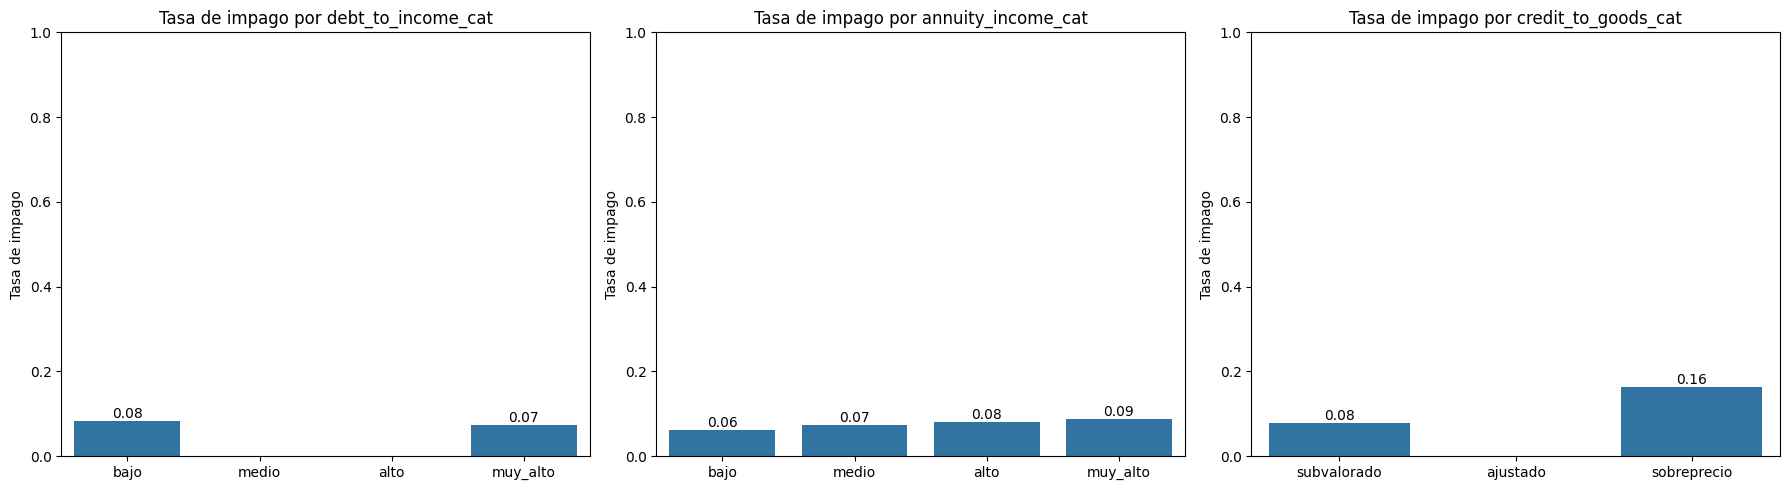

In [ ]:
# Selección del dataset sin_outliers_ordinal
dataset = next(d for d in datasets if d["nombre"] == "sin_outliers_ordinal")
X_train = dataset["X_train"].copy()
y_train = dataset["y_train"]

# Recalcular las variables categóricas eliminadas (temporalmente)
X_train["debt_to_income_cat"] = pd.cut(
    X_train["debt_to_income_ord"] * 3,  # Desescalar (rango original 0–3)
    bins=[-np.inf, 0.5, 1.5, 2.5, np.inf],
    labels=["bajo", "medio", "alto", "muy_alto"]
)

X_train["annuity_income_cat"] = pd.cut(
    X_train["annuity_income_ord"] * 3,
    bins=[-np.inf, 0.5, 1.5, 2.5, np.inf],
    labels=["bajo", "medio", "alto", "muy_alto"]
)

X_train["credit_to_goods_cat"] = pd.cut(
    X_train["credit_to_goods_ord"] * 2,
    bins=[-np.inf, 0.5, 1.5, np.inf],
    labels=["subvalorado", "ajustado", "sobreprecio"]
)

# Combinar con target para graficar
df_train = X_train.copy()
df_train["TARGET"] = y_train

# Gráfico de tasa de impago por categoría financiera
import matplotlib.pyplot as plt
import seaborn as sns

categorias = ["debt_to_income_cat", "annuity_income_cat", "credit_to_goods_cat"]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, cat in enumerate(categorias):
    tasas = df_train.groupby(cat)["TARGET"].mean().sort_index()
    sns.barplot(x=tasas.index, y=tasas.values, ax=axes[i])
    axes[i].set_title(f'Tasa de impago por {cat}')
    axes[i].set_ylabel('Tasa de impago')
    axes[i].set_xlabel('')
    axes[i].set_ylim(0, 1)
    axes[i].bar_label(axes[i].containers[0], fmt='%.2f')

plt.tight_layout()
plt.show()

### **Análisis de tasas de impago por categorías de ratios financieros**

El gráfico presenta la tasa de impago promedio para distintas discretizaciones de tres ratios financieros derivados: `debt_to_income`, `annuity_income_ratio` y `credit_to_goods_ratio`. Estos indicadores fueron transformados previamente en variables categóricas ordinales con el objetivo de facilitar su interpretación.

#### **debt_to_income_cat**

- Las categorías extremas ("bajo" y "muy_alto") presentan tasas de impago similares (0.08 y 0.07 respectivamente).
- Las categorías "medio" y "alto" no aparecen representadas en el gráfico, lo que sugiere que no había suficientes casos o que fueron eliminadas durante el preprocesado.
- No se observa una relación monótona clara entre el nivel de endeudamiento y el riesgo de impago en este indicador.

#### **annuity_income_cat**

- La tasa de impago aumenta progresivamente con el ratio entre cuota y salario.
- De 0.06 en "bajo" a 0.09 en "muy_alto", lo que indica una relación débil pero creciente entre carga financiera y riesgo de impago.
- Este patrón apoya la utilidad de esta variable como predictor del riesgo crediticio.

#### **credit_to_goods_cat**

- Este ratio muestra el **comportamiento más significativo**: los clientes en la categoría "sobreprecio" presentan una tasa de impago del 16 %, el doble que los grupos "subvalorado" o "ajustado".
- Esto indica que un crédito concedido muy por encima del valor del bien puede ser un fuerte indicador de riesgo, posiblemente asociado a prácticas de sobrefinanciación o solicitudes forzadas.

#### **Conclusión**

Entre los tres indicadores, `credit_to_goods_ratio` destaca por su capacidad para segmentar grupos con diferente nivel de riesgo, mostrando un claro patrón creciente. Este tipo de visualización no solo refuerza su relevancia en el modelo predictivo, sino que también ofrece un **insight de negocio directo** que puede utilizarse para ajustar políticas de concesión o detectar operaciones potencialmente irregulares.
